The purpose of this script is to go through the final datasets (gaza-israel and ukraine-russia) and for each claim check whether the final aggregated ground truth label is actually correct. This is done, since the first DEFAME model evaluation (on gaza-israel dataset) has shown that some of the ground truth labels from the fact-checking websites are incorrect, i.e. that claims are inconsistently labeled within each websites but also between websites. The goal is to find out the extent of wrong ground truth labels and think about whether the label aggregation into four final labels ("True", "False", "Misleading", "NEI") actually makes sense or whether, e.g., "False", "Misleading" and "NEI" should be one category.

The label definitions below are used for the systematic ground truth label check of both datasets. They are the exact same label definitions that were used in the model_1_run_1 DEFAME configurations (default label definitions in: DEFAME/defame/common/label.py; dataset label definitions: DEFAME/defame/eval/gaza_israel/benchmark.py and DEFAME/defame/eval/ukraine_russia/benchmark.py) for both the gaza-israel dataset (2025-07-20_09-52 default) and the ukraine-russia-dataset (2025-08-07 18-45 default):

In [12]:
### This is the relevant part copied from DEFAME: DEFAME/common/label.py


DEFAULT_LABEL_DEFINITIONS = {
   
    ### Adding the label definitions used in the label aggregation step within my dataset creation pipeline.

    "Label.TRUE": "The knowledge from the fact-check supports the Claim. The Claim is factually accurate when it is confirmed by "
                "evidence from multiple and reliable sources. Mere plausibility is not enough for this decision.",

    "Label.FALSE": "The knowledge from the fact-check clearly refutes the Claim. The Claim is demonstrably false when it is"
                 "disproven by evidence from multiple and reliable sources. The mere absence or lack of "
                   "supporting evidence is not enough reason for being refuted.",

    "Label.MISLEADING": "The claim or image is taken out of context, mispresented in a wrong context or necessary context is omitted."
                      "For example, an old claim or image is misrepresented in a new and different context. Other examples are"
                      "to omit the context of a claim or image or to misinterpret and distort the meaning of a claim. "
                      "In contrast to the label 'FALSE' the claim or image can also contain some true elements, which are taken out of context.",    ## VERITE -> all claims had images and thus the out-of-context and miscaptioned labels are related to images
                            ## in my datasets misleading claims are both text-only claims and claims with images

    "Label.NEI": "The fact-check does not contain sufficient information to come to an conclusion. For example,"
                "there is substantial lack of evidence or the evidence is inconclusive, conflicting or self-contradictory. "
                "In the case of a lack of evidence, state which information exactly is missing. In particular, if no RESULTS or sources are available, pick this decision."

}

In [13]:
### This is the benchmark.py file for the Gaza-Israel dataset: DEFAME/defame/eval/gaza_israel/benchmark.py



# class gaza_israel(Benchmark):
#     shorthand = "gaza_israel"

#     is_multimodal = True

#     class_mapping = { #Use the spelling of the labels in my datasets for mapping here (Starts with capital letter)
#         "True": "Label.TRUE",
#         "False": "Label.FALSE",
#         "Misleading": "Label.MISLEADING",
#         "NEI": "Label.NEI"

#     }


    ## Test these first label definitions for now. Might need some adjustments.

    ## TODO: maybe adding FEW-SHOT EXAMPLES in the class label definitions HERE???? or in the label.py file within the "common" folder?


class_definitions = {
        "Label.TRUE":
            "The claim is factually accurate when it is confirmed by evidence from multiple and reliable sources.",
        "Label.FALSE":
            "The claim is demonstrably false when it is disproven by evidence from multiple and reliable sources.",
        "Label.MISLEADING":
            "The claim or image is taken out of context, i.e. the claim or image is misrepresented in a wrong context or the necessary context is omitted. "
            "For example, an old claim or an old image is mispresented in a new context in a misleading way. If the claim refers to an image, it misrepresents the origin, content and/or meaning of the image."
            "If the claim is a text-only claim, i.e. it does not refer to an image, it misrepresents the origin, content, and/or meaning of a statement.",
        "Label.NEI":
            "The claim is marked as NEI when there is not enough evidence to verify the claim or if the evidence is conflicting or self-contradictory. "
    
    }

In [14]:
### This is the benchmark.py file for the Ukraine-Russia dataset: DEFAME/defame/eval/gaza_israel/benchmark.py
## The label definitions are exactly the same as for the gaza-israel dataset




# class ukraine_russia(Benchmark):
#     shorthand = "ukraine_russia"

#     is_multimodal = True

#     class_mapping = { #Use the spelling of the labels in my datasets for mapping here (Starts with capital letter)
#         "True": Label.TRUE,
#         "False": Label.FALSE,
#         "Misleading": Label.MISLEADING,
#         "NEI": Label.NEI

#     }


    ## Test these first label definitions for now. Might need some adjustments.

    ## TODO: maybe adding FEW-SHOT EXAMPLES in the class label definitions HERE???? or in the label.py file within the "common" folder?


class_definitions = {
        "Label.TRUE":
            "The claim is factually accurate when it is confirmed by evidence from multiple and reliable sources.",
        "Label.FALSE":
            "The claim is demonstrably false when it is disproven by evidence from multiple and reliable sources.",
        "Label.MISLEADING":
            "The claim or image is taken out of context, i.e. the claim or image is misrepresented in a wrong context or the necessary context is omitted. "
            "For example, an old claim or an old image is mispresented in a new context in a misleading way. If the claim refers to an image, it misrepresents the origin, content and/or meaning of the image."
            "If the claim is a text-only claim, i.e. it does not refer to an image, it misrepresents the origin, content, and/or meaning of a statement.",
        "Label.NEI":
            "The claim is marked as NEI when there is not enough evidence to verify the claim or if the evidence is conflicting or self-contradictory. "
    
    }

In [15]:
# import relevant libraries

import pandas as pd
import numpy as np 

### Ukraine-Russia Dataset

In [16]:
## import final dataset 

df_ukraine_russia_final = pd.read_csv("../../../gaza_ukraine_datasets/ukraine_russia/Combined_dataset/ukraine_russia_dataset_combined_010724_300425_final.csv", index_col=0)
print(len(df_ukraine_russia_final))
print(df_ukraine_russia_final.dtypes)
df_ukraine_russia_final.head()

79
id                            int64
Website                      object
Article_URL                  object
Headline                     object
Claim_Date                   object
Review_Date                  object
Query/Keyword                object
Original_Claim_Website       object
Original_Claim_Only          object
Claim                        object
Image_URL                    object
Image_Path                   object
Label_Website                object
Label                        object
Context/Label_Explanation    object
Text_Only_Claim                bool
Normal_Image                   bool
AI_Generated_Image             bool
Altered_Image                  bool
Data_Collection_Type         object
dtype: object


,id,Website,Article_URL,Headline,Claim_Date,Review_Date,Query/Keyword,Original_Claim_Website,Original_Claim_Only,Claim,Image_URL,Image_Path,Label_Website,Label,Context/Label_Explanation,Text_Only_Claim,Normal_Image,AI_Generated_Image,Altered_Image,Data_Collection_Type
0,0,AFP Factcheck,https://factcheck.afp.com/doc.afp.com.372Y6CV,Fake newspaper cover on Ukrainian soldiers in Kursk spreads online,2025-03-15 00:00:00,2025-03-19 00:00:00,"""War in Ukraine""","""The Kursk expedition was a disaster and a complete waste of life. Britain egged it on,"" says a March 15, 2025 post on X from Ian Miles Cheong, a far-right blogger who has previously spread other misinformation -- and whose posts have been repeatedly amplified by billionaire X owner Elon Musk. The post claims to show the Hull Daily Mail, a regional newspaper serving the port city of Hull in northeastern England, saying on its front page: ""70,000 Ukrainian soldiers in the Kursk region died in...","""70,000 Ukrainian soldiers in the Kursk region died in vain. The UK poured hundreds of millions of pounds into Zelensky's crushing failure.""","This image shows a screenshot of an authentic Hull Daily Mail's frontpage from March 13, 2025 saying '70,000 Ukrainian soldiers in the Kursk region died in vain. The UK poured hundreds of millions of pounds into Zelensky's crushing failure'.",https://web.archive.org/web/20250708170622/https://scontent-arn2-1.xx.fbcdn.net/v/t39.30808-6/484304343_642451842044376_1862227891799489919_n.jpg?_nc_cat=102&ccb=1-7&_nc_sid=127cfc&_nc_ohc=AQF6gx1x-YcQ7kNvwETthXn&_nc_oc=AdmyQn5avueVjfbAd73vfF1ieHVYNh21A86eE9m7Xk3NmnQBlMpPB8X_JJDNbK_BzjE&_nc_zt=23&_nc_ht=scontent-arn2-1.xx&_nc_gid=BKWAJi_JRI-jR90-PCMvag&oh=00_AfQfJPMoQ-UfrUCaoioCLQg_eit_H0SWZvqnR-rtXJdmPw&oe=687336CC,images/ukraine_russia/0.jpg,altered,False,"But the supposed Hull Daily Mail headline blasting Zelensky over the Kursk incursion is a fabrication.\n""That story re Ukraine was a fake,"" said Lija Kresowaty, a spokesperson for Reach PLC, the Hull Daily Mail's parent company, in a March 18 email.",False,False,False,True,Manual
1,1,AFP Factcheck,https://factcheck.afp.com/doc.afp.com.36YR9KZ,"No, Zelensky hasn't bought Eagle's Nest, it is still in ownership of Bavarian state",2025-02-18 00:00:00,2025-02-27 00:00:00,"""War in Ukraine""","According to the latest claims, Zelensky allegedly purchased another site steeped in history: the so-called Eagle's Nest, or Kehlsteinhaus, in Berchtesgaden in the southern German state of Bavaria, for 14.2 million euros.","According to the latest claims, Zelensky allegedly purchased another site steeped in history: the so-called Eagle's Nest, or Kehlsteinhaus, in Berchtesgaden in the southern German state of Bavaria, for 14.2 million euros.","Ukrainian President Volodymyr Zelenskyy purchased the Eagle's Nest, or Kehlsteinhaus, in Berchtesgaden in the southern German state of Bavaria, for 14.2 million euros.",NaN,NaN,FALSE,False,"The Eagle's Nest is in the property of the state of Bavaria. The administration of state-owned real estate is the responsibility of IMBY, which is listed in the alleged purchase agreement. On February 7, 2025, the company posted a press release on its website in which it called the claim ""deliberate misinformation"". The Eagle's Nest ""continues to be owned by the Free State of Bavaria"", the state-owned company stated. It said that a sale had neither taken place nor was planned. IMBY also addr...",True,False,False,False,Manual
2,2,AFP Factcheck,https://factcheck.afp.com/doc.afp.com.36YC3DG,Claims that Ukraine banned Truth Social are false,2025-02-20 00:00:00,2025-02-21 00:00:00,"""War in Ukraine""","""BREAKING: Zelensky blocks access to President Trump's social media platform Truth Social across Ukraine,"" says a February 20, 2025 X post from conservative influencer Benny Johnson, who AFP has previously fact-checked.","""BREAKING: Zelensky blocks access to President Trump's social media platform Truth Social across Ukraine.""",In F

In [17]:
pd.set_option('display.max_colwidth',500)  
df_ukraine_russia_final[df_ukraine_russia_final["Label"] == "NEI"]

,id,Website,Article_URL,Headline,Claim_Date,Review_Date,Query/Keyword,Original_Claim_Website,Original_Claim_Only,Claim,Image_URL,Image_Path,Label_Website,Label,Context/Label_Explanation,Text_Only_Claim,Normal_Image,AI_Generated_Image,Altered_Image,Data_Collection_Type
20,20,Reuters,https://www.reuters.com/fact-check/no-evidence-nato-chief-said-hell-expel-us-if-trump-surrenders-ukraine-2024-11-25/,Fact Check: No evidence NATO chief said he’ll expel US if Trump ‘surrenders Ukraine’\n,2024-11-05 00:00:00,2024-11-26 00:00:00,"""Ukraine Fact Check""","Posts on Facebook shared after Trump won the Nov. 5 U.S. presidential election said: “BREAKING: NATO Secretary General Mark Rutte says that ‘If Trump surrenders Ukraine to Putin, he will personally expel the United States from the alliance’” alongside comments asking if that “would be a bad thing”.","“BREAKING: NATO Secretary General Mark Rutte says that ‘If Trump surrenders Ukraine to Putin, he will personally expel the United States from the alliance’” alongside comments asking if that “would be a bad thing”.","After Donald Trump won the US presidential election in 2024, NATO Secretary General Mark Rutte said that ‘If Trump surrenders Ukraine to Putin, he will personally expel the United States from the alliance’.",NaN,NaN,no evidence,NEI,No evidence. There are no credible reports or references on NATO’s social media account or website that Rutte made the comment. A NATO official denied that Rutte made such a remark.,True,False,False,False,Manual
67,67,newsweek.com,https://www.newsweek.com/fact-check-has-russia-offered-assistance-california-wildfire-disaster-2014213,Fact Check: Has Russia Offered Assistance to California Wildfire Disaster?,2025-01-21 00:00:00+00:00,2025-01-21 00:00:00+00:00,Russia,NaN,Has Russia offered assistance to California wildfire disaster?,Russia offered assistance for the California wildfires from January 2025.,NaN,NaN,unverified,NEI,"Newsweek has not found any statement from Russian officials offering support to California. There are no official public statements from Sergey Shchetinin, named on Russian government websites as the Chairman of the Executive Committee of the Russian Union of Rescuers, under the Russian Emergencies Ministry.”",True,False,False,False,API


- claim with id 20: could also be re-labeled/aggreated to "False"
    - Snopes & Politifact, UsaToday also fact-checked the claim and labeled it as "False": https://www.snopes.com/fact-check/nato-trump-ukraine-putin/; https://www.politifact.com/factchecks/2024/nov/13/threads-posts/no-nato-secretary-general-mark-rutte-didnt-say-hed/; https://eu.usatoday.com/story/news/factcheck/2024/11/12/nato-threat-expel-us-trump-ukraine-fact-check/76198841007/

- claim with id 67: more difficult, but could probably also be aggregated to "False"


In [18]:
## import the dataframe with the label definitions of each fact-checking website used in the gaza-israel dataset

df_ukraine_russia_websites_methodology = pd.read_csv("../../../gaza_ukraine_datasets/ukraine_russia/Combined_dataset/df_ukraine_russia_websites_methodology_label_overview.csv", index_col=0)
print(len(df_ukraine_russia_websites_methodology))
df_ukraine_russia_websites_methodology.head()

46


,AFP Factcheck,Reuters,Snopes,Politifact,misbar.com,usatoday.com,checkyourfact.com,newschecker.in,newsweek.com,rappler.com
Altered,NaN,"Genuine image, audio, or video that has been manipulated with the intent to deceive or harm.",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Altered Photo,When a photo has been manipulated to deceive.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Altered Photo/Video,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"This applies to images, video, or audio content which have been edited or synthesized beyond adjustments for clarity or quality, in ways that could mislead people. This definition includes splicing, but not media excerpts or taking media out of context."
Altered Video,When a video has been manipulated to deceive.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Commotion,NaN,NaN,NaN,NaN,"The title and claim contain exaggerated elements aimed to attract attention and arouse the readers’ interest, but the content of the story is unrelated to the claim or the title.",NaN,NaN,NaN,NaN,NaN


In [19]:
## Go through each claim and add a column to the df which states whether the ground truth label ("Label") is correct or not. Add a second column which, if applicable, states what the actual ground truth label should be
## Also add a third column which gives the justification, why the ground truth label is wrong or why it should be different.
## Create a dictionary to store this information and append it to the df 


### 1) Start with the first 5 claims

pd.set_option('display.max_colwidth', None)


df_ukraine_russia_final[:5]

,id,Website,Article_URL,Headline,Claim_Date,Review_Date,Query/Keyword,Original_Claim_Website,Original_Claim_Only,Claim,Image_URL,Image_Path,Label_Website,Label,Context/Label_Explanation,Text_Only_Claim,Normal_Image,AI_Generated_Image,Altered_Image,Data_Collection_Type
0,0,AFP Factcheck,https://factcheck.afp.com/doc.afp.com.372Y6CV,Fake newspaper cover on Ukrainian soldiers in Kursk spreads online,2025-03-15 00:00:00,2025-03-19 00:00:00,"""War in Ukraine""","""The Kursk expedition was a disaster and a complete waste of life. Britain egged it on,"" says a March 15, 2025 post on X from Ian Miles Cheong, a far-right blogger who has previously spread other misinformation -- and whose posts have been repeatedly amplified by billionaire X owner Elon Musk. The post claims to show the Hull Daily Mail, a regional newspaper serving the port city of Hull in northeastern England, saying on its front page: ""70,000 Ukrainian soldiers in the Kursk region died in vain. The UK poured hundreds of millions of pounds into Zelensky's crushing failure.""","""70,000 Ukrainian soldiers in the Kursk region died in vain. The UK poured hundreds of millions of pounds into Zelensky's crushing failure.""","This image shows a screenshot of an authentic Hull Daily Mail's frontpage from March 13, 2025 saying '70,000 Ukrainian soldiers in the Kursk region died in vain. The UK poured hundreds of millions of pounds into Zelensky's crushing failure'.",https://web.archive.org/web/20250708170622/https://scontent-arn2-1.xx.fbcdn.net/v/t39.30808-6/484304343_642451842044376_1862227891799489919_n.jpg?_nc_cat=102&ccb=1-7&_nc_sid=127cfc&_nc_ohc=AQF6gx1x-YcQ7kNvwETthXn&_nc_oc=AdmyQn5avueVjfbAd73vfF1ieHVYNh21A86eE9m7Xk3NmnQBlMpPB8X_JJDNbK_BzjE&_nc_zt=23&_nc_ht=scontent-arn2-1.xx&_nc_gid=BKWAJi_JRI-jR90-PCMvag&oh=00_AfQfJPMoQ-UfrUCaoioCLQg_eit_H0SWZvqnR-rtXJdmPw&oe=687336CC,images/ukraine_russia/0.jpg,altered,False,"But the supposed Hull Daily Mail headline blasting Zelensky over the Kursk incursion is a fabrication.\n""That story re Ukraine was a fake,"" said Lija Kresowaty, a spokesperson for Reach PLC, the Hull Daily Mail's parent company, in a March 18 email.",False,False,False,True,Manual
1,1,AFP Factcheck,https://factcheck.afp.com/doc.afp.com.36YR9KZ,"No, Zelensky hasn't bought Eagle's Nest, it is still in ownership of Bavarian state",2025-02-18 00:00:00,2025-02-27 00:00:00,"""War in Ukraine""","According to the latest claims, Zelensky allegedly purchased another site steeped in history: the so-called Eagle's Nest, or Kehlsteinhaus, in Berchtesgaden in the southern German state of Bavaria, for 14.2 million euros.","According to the latest claims, Zelensky allegedly purchased another site steeped in history: the so-called Eagle's Nest, or Kehlsteinhaus, in Berchtesgaden in the southern German state of Bavaria, for 14.2 million euros.","Ukrainian President Volodymyr Zelenskyy purchased the Eagle's Nest, or Kehlsteinhaus, in Berchtesgaden in the southern German state of Bavaria, for 14.2 million euros.",NaN,NaN,FALSE,False,"The Eagle's Nest is in the property of the state of Bavaria. The administration of state-owned real estate is the responsibility of IMBY, which is listed in the alleged purchase agreement. On February 7, 2025, the company posted a press release on its website in which it called the claim ""deliberate misinformation"". The Eagle's Nest ""continues to be owned by the Free State of Bavaria"", the state-owned company stated. It said that a sale had neither taken place nor was planned. IMBY also addressed details from the video: ""The alleged purchase agreement shown in the video is a forgery, and the same applies to the alleged quote from IMBY's management"". It will also take legal action against the misinformation.",True,False,False,False,Manual
2,2,AFP Factcheck,https://factcheck.afp.com/doc.afp.com.36YC3DG,Claims that Ukraine banned Truth Social are false,2025-02-20 00:00:00,2025-02-21 00:00:00,"""War in Ukraine""","""BREAKING: Zelensky blocks access 

In [20]:
gt_label_check_part_1 = {

    0: {
        "gt_label_incorrect": False, 
        "actual_gt_label": "False", #the same as original final "Label"
        "justification_gt_label_correct/incorrect": """ The label is correct, since it refers to an altered/AI image. All claims with atered/AI images have been reformulated in a consistent way so all have the final label "False"."""

    },

    1: {
        "gt_label_incorrect": False, 
        "actual_gt_label": "False", #the same as original final "Label"
        "justification_gt_label_correct/incorrect": """ The label is correct. The claim is demonstrably wrong and has been disproven: On February 7, 2025, the company posted a press release on its website in which it called the claim "deliberate misinformation" """

        
    },

    2: {
        "gt_label_incorrect": False, 
        "actual_gt_label": "False", #the same as original final "Label"
        "justification_gt_label_correct/incorrect": """ The label is correct. The claim is demonstrably wrong and has been disproven: A spokesperson for Trump Media and Technology Group, which owns Truth Social, said the company has not launched the micro-blogging site in Ukraine."""
    },

    3: {
        "gt_label_incorrect": False,
        "actual_gt_label": "False", #the same as original final "Label"
        "justification_gt_label_correct/incorrect": """ The label is correct, since it refers to an altered/AI image. All claims with atered/AI images have been reformulated in a consistent way so all have the final label "False"."""
    },

    4: {
        "gt_label_incorrect": True,
        "actual_gt_label": "Misleading",
        "justification_gt_label_correct/incorrect": """ The image is taken out of context. The image is from 2006 and the context is Afghanistan.
                                                        The AFP Factcheck methodology also defines the label 'Misleading' as: 'an item is misleading when it uses genuine information (text, photo or video), taken out of context or mixed with false context'."""
    }
}

In [21]:
## 2) The next 5 claims

df_ukraine_russia_final[5:10]

,id,Website,Article_URL,Headline,Claim_Date,Review_Date,Query/Keyword,Original_Claim_Website,Original_Claim_Only,Claim,Image_URL,Image_Path,Label_Website,Label,Context/Label_Explanation,Text_Only_Claim,Normal_Image,AI_Generated_Image,Altered_Image,Data_Collection_Type
5,5,AFP Factcheck,https://factcheck.afp.com/doc.afp.com.36LH9P7,Zelensky targeted with fake picture of 'Hitler's Mercedes at presidential palace',2024-10-08 00:00:00,2024-11-08 00:00:00,"""War in Ukraine""","""Hitler's parade car was bought by Zelensky,"" says a post in the Chinese social media platform Weibo from October 8, 2024.\nIt showed an image of a Mercedes-Benz 770 parked outside a building, alongside a photo of Zelensky captioned: ""Zelensky purchased Hitler's car for $15 M"".\nIt said the vehicle's ""mystery"" owner was revealed when the Ukrainian leader ""was spotted getting out of the car in Kyiv"".","""Hitler's parade car was bought by Zelensky for $ 15 M.""",This image shows Hitler's parade car which was bought by the Ukrainian president Volodymyr Zelenskyy for 15 Million US-$.,https://web.archive.org/web/20250708171152/https://pbs.twimg.com/media/DzTnadMX4AEYfc2?format=jpg&name=medium,images/ukraine_russia/5.jpg,FALSE,False,The Ukrainian Center for Combating Disinformation -- part of the country's National Security and Defense Council -- refuted the false claim that the photo showed Hitler's Mercedes at the presidential palace (archived link).,False,True,False,False,Manual
6,6,AFP Factcheck,https://factcheck.afp.com/doc.afp.com.36H63KK,"Decades-old image shows airshow collision, not 'US fighter jet shot down by Russia'\n\n",2024-09-23 00:00:00,2024-09-27 00:00:00,"""War in Ukraine""","""A US F16 fighter jet was shot down on the 28th in airspace over the Black Sea after refusing to obey Russian orders. The video was made public,"" read the simplified Chinese caption to a TikTok video shared on September 23, 2024.\nThe video appears to show an image of a fighter jet in flames, followed by photos of US defence chief Lloyd Austin and Russian foreign ministry spokeswoman Maria Zakharova.","""A US F16 fighter jet was shot down on the 28th in airspace over the Black Sea after refusing to obey Russian orders.""",This image shows a US F-16 fighter jet which was shot down in August 2024 in airspace over the Black Sea after refusing to obey Russian orders.,https://web.archive.org/web/20250117223533/https://d3trj3zqmkebtg.cloudfront.net/pics/48/48672_big.jpg,images/ukraine_russia/6.jpg,FALSE,False,"While a US-made F-16 -- supplied to Ukraine by its Western allies -- crashed during a combat mission in August 2024, the image shows a Russian MiG-29 that collided with another aircraft during an airshow on July 24, 1993.",False,True,False,False,Manual
7,7,AFP Factcheck,https://factcheck.afp.com/doc.afp.com.36FQ2MU,BlackRock did not ask Ukraine to 'stop burying dead soldiers on its land'\n\n,2024-08-03 00:00:00,2024-09-13 00:00:00,"""War in Ukraine""","""BlackRock has asked that Ukrainian soldiers not be buried on the land it owns in Ukraine,"" read a simplified Chinese X post shared on August 3, 2024.\nIt said BlackRock representatives ""have already bought 47 percent of Ukraine's land"" and requested on a recent visit to Kyiv that ""this land not be used for burials and that the bodies be cremated or disposed of in other ways.""","""BlackRock has asked that Ukrainian soldiers not be buried on the land it owns in Ukraine.""",BlackRock has asked that Ukrainian soldiers not be buried on the land it owns in Ukraine.,NaN,NaN,FALSE,False,"However, a representative for BlackRock said the claim was baseless.\n""This is completely false,"" the spokesperson told AFP on August 22. ""BlackRock Inc. does not own any land in Ukraine.""\nA spokesperson for the land committee of the Ukrainian Agribusiness Club (UCAB) told AFP on the same day: ""We haven't heard about anything like that.""\nFrederic Mousseau, policy director at the US-based Oakland Institute think tank -- which ha

In [22]:
gt_label_check_part_2 = {

    5: {
        "gt_label_incorrect": False, 
        "actual_gt_label": "False", #the same as original final "Label"
        "justification_gt_label_correct/incorrect": """ The label is correct. The claim is demonstrably wrong and has been disproven by the Ukrainian Center for Combating Disinformation."""

    },

    6: {
        "gt_label_incorrect": True, 
        "actual_gt_label": "Misleading", 
        "justification_gt_label_correct/incorrect": """ The label is incorrect. The image is taken out of context and is originally from an airshow collision from July 1993. """


    },

    7: {
        "gt_label_incorrect": False, 
        "actual_gt_label": "False", #the same as original final "Label"
        "justification_gt_label_correct/incorrect": """ The label is correct. The claim is demonstrably wrong and has been disprovenby a representative for BlackRock: "This is completely false," the spokesperson told AFP on August 22. "BlackRock Inc. does not own any land in Ukraine". """
    },

    8: {
        "gt_label_incorrect": True,
        "actual_gt_label": "Misleading", 
        "justification_gt_label_correct/incorrect": """ The label is incorrect. The image is taken out of context and is originally from the Covid-19 context in 2020."""
    },

    9: {
        "gt_label_incorrect": True,
        "actual_gt_label": "Misleading",
        "justification_gt_label_correct/incorrect": """ The label is incorrect. The image is taken out of context. The image is from 2022 in Kharkiv."""
    }
}

In [23]:
## 3) The next 5 claims

df_ukraine_russia_final[10:15]

,id,Website,Article_URL,Headline,Claim_Date,Review_Date,Query/Keyword,Original_Claim_Website,Original_Claim_Only,Claim,Image_URL,Image_Path,Label_Website,Label,Context/Label_Explanation,Text_Only_Claim,Normal_Image,AI_Generated_Image,Altered_Image,Data_Collection_Type
10,10,AFP Factcheck,https://factcheck.afp.com/doc.afp.com.367M8LM,US influencer baselessly claims Ukraine manipulated image of hospital bombing,2024-07-10 00:00:00,2024-08-01 00:00:00,"""War in Ukraine""","""The Ukrainian Government PHOTOSHOPPED fake children’s toys into images of the hospital they destroyed in Kiev. This is worse than ZIONIST PROPAGANDA!"" says a July 10, 2024 post on X from Jackson Hinkle, whom AFP has previously fact-checked for spreading wartime disinformation.","""The Ukrainian Government PHOTOSHOPPED fake children’s toys into images of the hospital they destroyed in Kiev. This is worse than ZIONIST PROPAGANDA!""","This image shows fake children's toys that were photoshopped into the image by the Ukrainian Government after Kyiv's pediatric hospital was attacked by Russian cruise missiles on July 8, 2024.",https://web.archive.org/web/20250708171914/https://pbs.twimg.com/media/GSBx-ubXMAAVizU?format=jpg&name=large,images/ukraine_russia/10.jpg,FALSE,False,"Hany Farid, a digital forensics expert at the University of California-Berkeley (archived here), told AFP in a July 12 email that the photo shows ""no evidence of digital manipulation or editing.""\nHe said the Ukrainian government's use of the camera's original RAW file further suggests it ""is not fake or manipulated."" RAW files retain all of the data from the camera's sensor, without any automatic retouching to the image.\nFarid said a model trained to distinguish real pictures from those created by artificial intelligence uncovered no signs of AI generation, either. But he added that he could not rule out whether the toys had been propped up or otherwise staged for dramatic effect.\nMatthew Stamm, head of Drexel University's Multimedia and Information Security Lab (archived here), said July 13 that he also ""found no evidence of manipulation.""",False,True,False,False,Manual
11,11,AFP Factcheck,https://factcheck.afp.com/doc.afp.com.363K9LL,Posts falsely claim Zelensky's wife purchased $5 million luxury car,2024-07-06 00:00:00,2024-07-11 00:00:00,"""War in Ukraine""","""Zelinsky's wife just bought a $5,000,000.00 Bugatti while vacationing in Paris. Bravo! Let's send more money over,"" says a July 6, 2024 Facebook post.","""Zelinsky's wife just bought a $5,000,000.00 Bugatti while vacationing in Paris. Bravo! Let's send more money over.""","Ukrainian President Volodymyr Zelenskyy's wife bought a $5,000,000.00 Bugatti while vacationing in Paris.",NaN,NaN,FALSE,False,"The main piece of evidence in the posts is a photo of an invoice with the Bugatti logo.\nThe document indicates Zelenska should receive the luxury car in 2026. The invoice also says the price is 4,462,400, but it does not specify any currency.\nCar Lovers, the firm that owns the Bugatti dealership in Paris, called the document ""fake news"" in a July 2 press release (archived here).\n""The Car Lovers group vehemently denies both that this transaction took place and, therefore, that this invoice exists,"" the company said.\n""Not only do the mandatory legal notices not appear on the invoice, but the price of the vehicle is also wrong, the price of the options and their description are inexact and incoherent, the visual corporate identity is outdated and the Car Lovers group would never have allowed such a document to be issued.""\nThe dealership address is misspelled on the invoice, with an ""l"" missing in ""Neuilly-sur-Seine."" The document also lacks mandatory information, such as the applicable value-added tax (VAT), and shows a number used in the Australian banking system but not in France.",True,False,False,False,Manual
12,12,Reuters,https://www.reuters.com/fact-check/photo-world-leaders-removing-suit-jackets-ukraine-is-al

In [24]:
gt_label_check_part_3 = {

    10: {
        "gt_label_incorrect": False, 
        "actual_gt_label": "False", #the same as original final "Label"
        "justification_gt_label_correct/incorrect": """ The label is correct. There is no indication that the toys in the image are fake as stated by the forensic expert in the AFP Factcheck."""

    },

    11: {
        "gt_label_incorrect": False, 
        "actual_gt_label": "False", 
        "justification_gt_label_correct/incorrect": """ The label is correct. The claim is demonstrably wrong and has been disproven by Car Lovers, the firm that owns the Bugatti dealership in Paris, calling the document "fake news" in a July 2 press release. """

    },

    12: {
        "gt_label_incorrect": False, 
        "actual_gt_label": "False", #the same as original final "Label"
        "justification_gt_label_correct/incorrect": """ The label is correct, since it refers to an altered/AI image. All claims with atered/AI images have been reformulated in a consistent way so all have the final label "False"."""
    },

    13: {
        "gt_label_incorrect": False,
        "actual_gt_label": "Misleading", #the same as original final "Label"
        "justification_gt_label_correct/incorrect": """ The label is correct. The image is taken out of context and is correctly labeled as 'Misleading'."""
    },

    14: {
        "gt_label_incorrect": False,
        "actual_gt_label": "False", #the same as original final "Label"
        "justification_gt_label_correct/incorrect": """ The label is correct, since it refers to an altered/AI image. All claims with atered/AI images have been reformulated in a consistent way so all have the final label "False"."""
    }
}

In [25]:
## 4) The next 5 claims

df_ukraine_russia_final[15:20]

,id,Website,Article_URL,Headline,Claim_Date,Review_Date,Query/Keyword,Original_Claim_Website,Original_Claim_Only,Claim,Image_URL,Image_Path,Label_Website,Label,Context/Label_Explanation,Text_Only_Claim,Normal_Image,AI_Generated_Image,Altered_Image,Data_Collection_Type
15,15,Reuters,https://www.reuters.com/fact-check/zelenskiys-latest-approval-rating-is-63-not-4-contrary-trumps-claim-2025-02-21/,"Fact Check: Zelenskiy's latest approval rating is 63%, not 4%, contrary to Trump's claim",2025-02-18 00:00:00,2025-02-21 00:00:00,"""Ukraine Fact Check""","""We have a situation where we haven't had elections in Ukraine; where we have martial law; where the leader of Ukraine - I hate to say it – but he's down at 4% approval rating,"" Trump said on February 18, opens new tab without offering any evidence, after being asked whether the U.S. would support Ukraine having fresh elections.","""We have a situation where we haven't had elections in Ukraine; where we have martial law; where the leader of Ukraine - I hate to say it – but he's down at 4% approval rating.""",In February 2025 Ukrainian President Volodymyr Zelenskyy's approval rating in Ukraine was down at 4%.,NaN,NaN,FALSE,False,"However, a poll, carried out by the Kyiv International Institute of Sociology, opens new tab (KIIS) found 63% of Ukrainian respondents approved of Zelenskiy, up from 56% in May 2024.\nThe White House, contacted by Reuters, declined to comment.\nThe latest poll, part of a project funded by The British Academy, surveyed 1,600 people between November 2024 and January 2025. Asked whether they approve or disapprove of Zelenskiy's actions as president, 26.1% of respondents said they “completely approve” and 36.9% said they “tend to approve”.\nAnother KIIS survey, carried out from February 4-9 this year, found 57% of Ukrainians trust Zelenskiy. The poll showed 37% of respondents do not trust him.\nAnton Hrushetskyi, director of KIIS, told Reuters that while similar, trust and approval are not identical concepts. He said a person can approve of someone's activities, but that does not necessarily mean that they trust them.\nOlga Onuch, a professor in comparative and Ukrainian politics at the University of Manchester who worked with KIIS to produce the surveys, said in a statement on Wednesday, opens new tab: “Trump’s claim is not only factually incorrect, but also irresponsible and anti-democratic - Zelenskiy remains a fairly popular political leader in Ukraine. Spreading misinformation about his legitimacy directly aids Kremlin propaganda and undermines the Ukrainian people's right to determine their own future.”",True,False,False,False,Manual
16,16,Reuters,https://www.reuters.com/fact-check/zelenskiys-quote-about-trump-nato-membership-lacks-context-2024-12-20/,Fact Check: Zelenskiy’s quote about Trump and NATO membership lacks context\n,2024-12-09 00:00:00,2024-12-20 00:00:00,"""Ukraine Fact Check""","Posts on Facebook, and X in December, quoted the Ukrainian leader as saying: “ZELENSKY: ""I WILL ASK BIDEN TO INVITE ME TO NATO...THERE'S NO POINT IN TALKING TO TRUMP.""","“ZELENSKY: ""I WILL ASK BIDEN TO INVITE ME TO NATO...THERE'S NO POINT IN TALKING TO TRUMP.""","In a press conference on December 9, 2024 Ukrainian President Volodymyr Zelenskyy said: 'I will ask Biden to invite me to NATO ... there's no point in talking to Trump.'",NaN,NaN,missing context,Misleading,"Zelenskiy told reporters at a joint press conference with German opposition leader Friedrich Merz on Dec. 9 that he hoped to call outgoing U.S. President Joe Biden in the coming days to discuss an invitation to the military alliance.\nHe did also say that he saw no reason to speak to Trump.\nHowever, these comments presented alone lack important context, as Zelenskiy said he saw no reason to speak to Trump, because Trump was not yet the sitting president.",True,False,False,False,Manual
17,17,Reuters,https://www.reuters.com/fact-check/ukraines-president-zelenskiy-did-not-buy-palace-des-neiges-hotel-fre

In [26]:
gt_label_check_part_4 = {

    15: {
        "gt_label_incorrect": False, 
        "actual_gt_label": "False", #the same as original final "Label"
        "justification_gt_label_correct/incorrect": """ The label is correct. The claim is demonstrably wrong and has been disproven by the latest poll carried out by the Kyiv International Institute of Sociology."""

    },

    16: {
        "gt_label_incorrect": False, 
        "actual_gt_label": "Misleading", #the same as original final "Label"
        "justification_gt_label_correct/incorrect": """ The label is correct. The claim is mispresenting Zelensky's statement as it omits important context: Zelenskyy said he saw no reason to speak to Trump, because Trump was not yet the sitting president."""

    },



    17: {
        "gt_label_incorrect": False, 
        "actual_gt_label": "False", #the same as original final "Label"
        "justification_gt_label_correct/incorrect": """ The label is correct. The claim is demonstrably wrong and has been disproven by a spokesperson for the office of the president of Ukraine saying the report was "fake"."""
    },

    18: {
        "gt_label_incorrect": False,
        "actual_gt_label": "False", #the same as original final "Label"
        "justification_gt_label_correct/incorrect": """ The label is correct. The claim is demonstrably wrong, since the man was jailed for 14 years for state treason and not for burning a copy of the Koran."""
    },

    19: {
        "gt_label_incorrect": False,
        "actual_gt_label": "Misleading", #the same as original final "Label"
        "justification_gt_label_correct/incorrect": """ The label is correct. The claim is misrepresenting Meloni's statement."""
    }
}

In [27]:
## 5) The next 5 claims

df_ukraine_russia_final[20:25]

,id,Website,Article_URL,Headline,Claim_Date,Review_Date,Query/Keyword,Original_Claim_Website,Original_Claim_Only,Claim,Image_URL,Image_Path,Label_Website,Label,Context/Label_Explanation,Text_Only_Claim,Normal_Image,AI_Generated_Image,Altered_Image,Data_Collection_Type
20,20,Reuters,https://www.reuters.com/fact-check/no-evidence-nato-chief-said-hell-expel-us-if-trump-surrenders-ukraine-2024-11-25/,Fact Check: No evidence NATO chief said he’ll expel US if Trump ‘surrenders Ukraine’\n,2024-11-05 00:00:00,2024-11-26 00:00:00,"""Ukraine Fact Check""","Posts on Facebook shared after Trump won the Nov. 5 U.S. presidential election said: “BREAKING: NATO Secretary General Mark Rutte says that ‘If Trump surrenders Ukraine to Putin, he will personally expel the United States from the alliance’” alongside comments asking if that “would be a bad thing”.","“BREAKING: NATO Secretary General Mark Rutte says that ‘If Trump surrenders Ukraine to Putin, he will personally expel the United States from the alliance’” alongside comments asking if that “would be a bad thing”.","After Donald Trump won the US presidential election in 2024, NATO Secretary General Mark Rutte said that ‘If Trump surrenders Ukraine to Putin, he will personally expel the United States from the alliance’.",NaN,NaN,no evidence,NEI,No evidence. There are no credible reports or references on NATO’s social media account or website that Rutte made the comment. A NATO official denied that Rutte made such a remark.,True,False,False,False,Manual
21,21,Reuters,https://www.reuters.com/fact-check/fabricated-quote-by-sheinbaum-calling-zelenskiy-drug-addict-2024-09-30/,Fact Check: Fabricated quote by Sheinbaum calling Zelenskiy a ‘drug addict’ \n,2024-09-18 00:00:00,2024-09-30 00:00:00,"""Ukraine Fact Check""","Posts on social media falsely cite Sheinbaum as rejecting the invitation by saying, about Zelenskiy, “If I wanted to see a drug addict, I'd just take a walk around Tijuana.”","“If I wanted to see a drug addict, I'd just take a walk around Tijuana.”","Mexican President-elect Claudia Sheinbaum rejected an invitation to Ukraine by Volodymr Zelenskyy and said towards him on September 17, 2024: 'If I wanted to see a drug addict, I'd just take a walk around Tijuana.'",NaN,NaN,FALSE,False,"Mexican President-elect Claudia Sheinbaum said on Sept. 17 that she did not immediately plan to visit Ukraine, citing her prioritization of domestic issues and Mexico’s principle of non-interference in foreign affairs. She did not call Ukrainian President Volodymyr Zelenskiy a drug addict, contrary to a fabricated quote shared online.",True,False,False,False,Manual
22,22,Reuters,https://www.reuters.com/fact-check/orange-smoke-cloud-photo-predates-kursk-assault-by-nearly-decade-2024-08-16/,Fact Check: Orange smoke cloud photo predates Kursk assault by nearly a decade,2024-08-11 00:00:00,2024-08-16 00:00:00,"""Ukraine Fact Check""","The caption of one of the social media posts sharing the image says, in part: “First picture of a CHEMICAL attack by Ukrainian artillery in KURSK !!!!!!! The Armed Forces of Ukraine used chemical weapons in the Kursk region. According to the Aida group, the enemy used ammunition filled with chlorine.”","“First picture of a CHEMICAL attack by Ukrainian artillery in KURSK !!!!!!! The Armed Forces of Ukraine used chemical weapons in the Kursk region. According to the Aida group, the enemy used ammunition filled with chlorine.”",This image shows a chemical attack by the Armed Forces of Ukraine during the Kursk offensive in August 2024.,https://web.archive.org/web/20250708172556/https://pbs.twimg.com/media/GUqcvO4XAAAP3dz?format=jpg&name=large,images/ukraine_russia/22.jpg,miscaptioned,Misleading,"The same scene can be seen at timestamp 00:09 of a March 2015 BBC News video titled “Islamic State's toxic ‘chlorine gas’ bombs.”\nThe clip, provided by Iraqi officials, shows orange smoke rising from a controlled explosion and Iraqi officials said there was evidence that Islamic State m

In [28]:
gt_label_check_part_5 = {

    20: {
        "gt_label_incorrect": False, 
        "actual_gt_label": "NEI", #the same as original final "Label"
        "justification_gt_label_correct/incorrect": """ The label will be unchanged. However, since a NATO official denied that Rutte made the alleged statement, one could also argue to label it 'False' instead of 'NEI'. """

    },

    21: {
        "gt_label_incorrect": True, 
        "actual_gt_label": "Misleading", 
        "justification_gt_label_correct/incorrect": """ The label is incorrect. It should be 'Misleading', because Sheinbaum did comment on Zelensky's invitation on September 17 2024, but the claim is mispresenting her words."""

    },


    22: {
        "gt_label_incorrect": False, 
        "actual_gt_label": "Misleading", #the same as original final "Label"
        "justification_gt_label_correct/incorrect": """ The label is correct. The image is taken out of context and is originally from Iraq in 2015."""
    },

    23: {
        "gt_label_incorrect": False,
        "actual_gt_label": "False", #the same as original final "Label"
        "justification_gt_label_correct/incorrect": """ The label is correct. The claim is demonstrably wrong and has been disproven by the U.S. government's inspector general."""
    },

    24: {
        "gt_label_incorrect": False,
        "actual_gt_label": "False", #the same as original final "Label"
        "justification_gt_label_correct/incorrect": """ The label is correct. The claim is demonstrably wrong. It is not Warren Buffet, but his son Howard Buffett."""
    }
}

In [29]:
## 6) The next 5 claims

df_ukraine_russia_final[25:30]

,id,Website,Article_URL,Headline,Claim_Date,Review_Date,Query/Keyword,Original_Claim_Website,Original_Claim_Only,Claim,Image_URL,Image_Path,Label_Website,Label,Context/Label_Explanation,Text_Only_Claim,Normal_Image,AI_Generated_Image,Altered_Image,Data_Collection_Type
25,25,Snopes,https://www.snopes.com/fact-check/jd-vance-cousin-nate-fought-in-ukraine-3-years/,"Yes, Vice President JD Vance's cousin Nate fought in Ukraine for three years\n",2025-03-11 00:00:00,2025-03-12 00:00:00,"""Ukraine""",U.S. Vice President JD Vance's cousin Nate Vance fought in Ukraine for three years during its war with Russia.,U.S. Vice President JD Vance's cousin Nate Vance fought in Ukraine for three years during its war with Russia.,U.S. Vice President JD Vance's cousin Nate Vance fought in Ukraine for three years during its war with Russia.,NaN,NaN,TRUE,True,"Snopes readers searched our site and submitted emails asking if the claim was true. While we could not independently confirm that the claim was true, several reputable news organizations from various countries, including CNN and French newspaper Le Figaro (archived), all reported that Vance volunteered to fight in Ukraine and served alongside Ukrainian forces for three years, and provided sufficient photographic evidence.",True,False,False,False,Manual
26,26,Snopes,https://www.snopes.com/fact-check/zelenskyy-us-ukraine-war-quote/,Zelenskyy saying US will have to send 'sons and daughters to war' in Ukraine is from old video,2025-03-03 00:00:00,2025-03-05 00:00:00,"""Ukraine""","Ukrainian President Volodymyr Zelenskyy said the U.S. will have ""to send their sons and daughters"" to die for Ukraine after having a heated exchange with U.S. President Donald Trump at the White House in February 2025.","Ukrainian President Volodymyr Zelenskyy said the U.S. will have ""to send their sons and daughters"" to die for Ukraine after having a heated exchange with U.S. President Donald Trump at the White House in February 2025.",Ukrainian President Volodymyr Zelenskyy said the U.S. will have 'to send their sons and daughters' to die for Ukraine after having a heated exchange with U.S. President Donald Trump at the White House in February 2025.,NaN,NaN,miscaptioned,Misleading,"Zelenskyy did say, ""The U.S. will have to send their sons and daughters exactly the same way as we are sending [our] sons and daughters to war."" However, he was talking about a hypothetical situation in which Ukraine losing the war against Russia would lead to a broader conflict resulting in Americans being pulled into fighting. He made this statement in February 2023, two years before the exchange with Trump took place.",True,False,False,False,Manual
27,27,Snopes,https://www.snopes.com/fact-check/zelenskyy-houses-planes-offshores-accounts/,"The facts behind resurfaced claim that Zelenskyy has multiple homes, planes, offshore accounts",2025-02-28 00:00:00,2025-03-05 00:00:00,"""Ukraine""","Ukrainian President Volodymyr Zelenskyy owns 15 homes including a $35 million home in Florida, has $1.2 billion in an overseas bank account, owns 15 homes, three private planes and has a monthly income of $11 million.","Ukrainian President Volodymyr Zelenskyy owns 15 homes including a $35 million home in Florida, has $1.2 billion in an overseas bank account, owns 15 homes, three private planes and has a monthly income of $11 million.","Ukrainian President Volodymyr Zelenskyy owns 15 homes including a $35 million home in Florida, has $1.2 billion in an overseas bank account, owns 15 homes, three private planes and has a monthly income of $11 million.",NaN,NaN,FALSE,False,"The Ukrainian president submitted a 2024 asset declaration to the National Agency on Corruption Prevention covering 2023 that detailed his owned properties, income, bank accounts and vehicles. The NACP is a Ukrainian government unit that takes asset declarations from all politicians who receive a salary from the state. \nAccording to the declaration, Zelenskyy owned fewer than 15 pr

In [30]:
gt_label_check_part_6 = {

    25: {
        "gt_label_incorrect": False, 
        "actual_gt_label": "True", #the same as original final "Label"
        "justification_gt_label_correct/incorrect": """ The label is correct. The claim has been supported by multiple newspapers. """

    },

    26: {
        "gt_label_incorrect": False, 
        "actual_gt_label": "Misleading", #the same as original final "Label"
        "justification_gt_label_correct/incorrect": """ The label is correct. The claim is misrepresenting/taking the original statment out of context. It was made in 2023 and was about a hypothetical situation in which Ukraine would lose the war against Russia."""

    },


    27: {
        "gt_label_incorrect": False, 
        "actual_gt_label": "False", #the same as original final "Label"
        "justification_gt_label_correct/incorrect": """ The label is correct. The claim is demonstrably wrong and has been disproven by the data shared by Ukraine's National Agency on Corruption Prevention."""
    },



    28: {
        "gt_label_incorrect": False,
        "actual_gt_label": "True", #the same as original final "Label"
        "justification_gt_label_correct/incorrect": """ The label is correct. Walesa wrote the letter to Trump."""
    },

    29: {
        "gt_label_incorrect": False,
        "actual_gt_label": "True", #the same as original final "Label"
        "justification_gt_label_correct/incorrect": """ The label is correct."""
    }
}

- Comment: The label of the claim with id 29 is correct, but the text of the claim is wrong. 
    - The columns "Original_Claim_Website" and "Original_Claim_Only" have the correct claim, but the column "Claim" does not.
    - The manual mistake occured in the claim reformulation script ("claims_postprocessing_claim_reformulation.ipynb") and needs to be corrected.

In [31]:
## 7) The next 5 claims

df_ukraine_russia_final[30:35]

,id,Website,Article_URL,Headline,Claim_Date,Review_Date,Query/Keyword,Original_Claim_Website,Original_Claim_Only,Claim,Image_URL,Image_Path,Label_Website,Label,Context/Label_Explanation,Text_Only_Claim,Normal_Image,AI_Generated_Image,Altered_Image,Data_Collection_Type
30,30,Snopes,https://www.snopes.com/fact-check/minerals-deal-ukraine-russia-peace/,There's no Ukraine-Russia peace deal — but a US-Ukraine minerals deal could be a stepping stone\n,2025-02-25 00:00:00,2025-02-26 00:00:00,"""Ukraine""","In early 2025, Ukraine and Russia had reached a peace deal in their years-long war.","In early 2025, Ukraine and Russia had reached a peace deal in their years-long war.","On Feb. 28, 2025, before a meeting with U.S. President Donald Trump, Ukraine President Volodymyr Zelenskyy met with Democrats.",NaN,NaN,FALSE,False,"Claims of a peace deal between Ukraine and Russia actually repeat key parts of a proposed U.S.-Ukraine agreement for sharing revenue from Ukraine's natural assets, including minerals. This agreement is not a peace deal but would bring Americans to Ukraine and give the U.S. a vested interest in peace in the country.",True,False,False,False,Manual
31,31,Snopes,https://www.snopes.com/fact-check/ukraine-bans-orthodox-church/,Ukraine Banned Orthodox Church in August 2024?,2024-08-20 00:00:00,2024-08-21 00:00:00,"""Ukraine""","In August 2024, Ukraine passed legislation banning the Orthodox Church in Ukraine.","In August 2024, Ukraine passed legislation banning the Orthodox Church in Ukraine.","In August 2024, Ukraine passed legislation banning the Orthodox Church in Ukraine.",NaN,NaN,mixture,False,"What's True\nOn Aug. 20, 2024, the Ukrainian Parliament passed (though Ukrainian President Volodymyr Zelenskyy has not yet signed, as of this writing) legislation that would allow the government to ban the Russian-linked Ukrainian Orthodox Church. However …\nWhat's False\n… the law does not pertain to the Orthodox Church of Ukraine, the church to which the majority of Ukrainian Christians belong. Claims that Ukraine banned the Orthodox Church entirely or that it outlawed Christianity are false.",True,False,False,False,Manual
32,32,Snopes,https://www.snopes.com/fact-check/harris-ukraine-russia/,"Harris Once Said, 'Ukraine Is a Country in Europe. It Exists Next to Another Country Called Russia'?\n",2024-07-22 00:00:00,2024-07-22 00:00:00,"""Ukraine""","U.S. Vice President Kamala Harris once said, ""Ukraine is a country in Europe. It exists next to another country called Russia. Russia is a bigger country. Russia is a powerful country. Russia decided to invade a smaller country called Ukraine. So basically that's wrong.""","U.S. Vice President Kamala Harris once said, ""Ukraine is a country in Europe. It exists next to another country called Russia. Russia is a bigger country. Russia is a powerful country. Russia decided to invade a smaller country called Ukraine. So basically that's wrong.""","U.S. Vice President Kamala Harris once said, 'Ukraine is a country in Europe. It exists next to another country called Russia. Russia is a bigger country. Russia is a powerful country. Russia decided to invade a smaller country called Ukraine. So basically that's wrong.'",NaN,NaN,correct attribution,True,"Harris made the statement in March 2022, responding to a journalist's request to explain the situation in Ukraine in layman's terms. She continued, ""And it goes against everything that we stand for. There are terms that we use, we say, 'We respect the sovereignty, the territorial integrity of countries,' right? Their independence. Russia has gone into Ukraine militarily, unprovoked, with no justification other than to exercise its power to take over another country.""",True,False,False,False,Manual
33,33,Snopes,https://www.snopes.com/fact-check/fox-kyiv-russia-easter/,A Fox livestream news report labeled Kyiv a Russian city. Here's what we know,2025-04-20 00:00:00,2025-04-21 00:00:00,"""Russia""","A Fox News broadcast labeled Kyiv (the cap

In [32]:
gt_label_check_part_7 = {

    30: {
        "gt_label_incorrect": False, 
        "actual_gt_label": "False", #the same as original final "Label"
        "justification_gt_label_correct/incorrect": """ The label is correct. The US-Ukraine agreement was not a peace deal but would bring Americans to Ukraine and give the U.S. a vested interest in peace in the country. """

    },

    31: {
        "gt_label_incorrect": False, 
        "actual_gt_label": "False", #the same as original final "Label"
        "justification_gt_label_correct/incorrect": """ The label is correct. The legislation would allow the Ukrainian government to ban the Russian-linked Ukranian Orthodox Church, but not the Orthodox Church of Ukraine, which is not Russia-linked. 
                                                        These two churches are distinct entities."""
    },


    32: {
        "gt_label_incorrect": False, 
        "actual_gt_label": "True", #the same as original final "Label"
        "justification_gt_label_correct/incorrect": """ The label is correct. Kamal Harris has made that statement and multiple newspaper have reported on it."""
    },



    33: {
        "gt_label_incorrect": False,
        "actual_gt_label": "True", #the same as original final "Label"
        "justification_gt_label_correct/incorrect": """ The label is correct. Since the original Snopes' label was 'mostly true', the claim was reformulated in the postprocessing script
                                                        ("claims_postprocessing_claim_reformulation.ipynb) that is definitely true."""
    },

    34: {
        "gt_label_incorrect": False,
        "actual_gt_label": "True", #the same as original final "Label"
        "justification_gt_label_correct/incorrect": """ The label is correct. Joe Rogan did make the statement in one of his podcasts."""
    }
}

- Comment: The label of the claim with id 30 is correct, but the text of the claim is wrong. 
    - The columns "Original_Claim_Website" and "Original_Claim_Only" have the correct claim, but the column "Claim" does not.
    - The manual mistake occured in the claim reformulation script ("claims_postprocessing_claim_reformulation.ipynb") and needs to be corrected.

In [33]:
## 8) The next 5 claims

df_ukraine_russia_final[35:40]

,id,Website,Article_URL,Headline,Claim_Date,Review_Date,Query/Keyword,Original_Claim_Website,Original_Claim_Only,Claim,Image_URL,Image_Path,Label_Website,Label,Context/Label_Explanation,Text_Only_Claim,Normal_Image,AI_Generated_Image,Altered_Image,Data_Collection_Type
35,35,Snopes,https://www.snopes.com/fact-check/putin-wants-fauci-extradited-to-russia/,No Evidence Vladimir Putin Wants Fauci Extradited To Russia\n,2025-01-22 00:00:00,2025-01-23 00:00:00,"""Russia""","In January 2025, Russian President Vladimir Putin was seeking to have Dr. Anthony Fauci in the U.S. extradited to Russia in exchange for ending the war in Ukraine.","In January 2025, Russian President Vladimir Putin was seeking to have Dr. Anthony Fauci in the U.S. extradited to Russia in exchange for ending the war in Ukraine.","In January 2025, Russian President Vladimir Putin was seeking to have Dr. Anthony Fauci in the U.S. extradited to Russia in exchange for ending the war in Ukraine.",NaN,NaN,FALSE,False,"The claim was false, however. If Putin had made such a request, reliable news sources in either Russia or the United States would have reported on it. That had not happened. If Russia wanted to extradite Fauci, it would likely have to file a Red Flag Notice with Interpol. That, too, had not happened.\nEven if the claim came from a reliable source of information, there's a major hurdle standing in the way: The United States and Russia do not have an extradition treaty with each other. According to the U.S. Department of Justice, the U.S. does not generally extradite without a treaty.",True,False,False,False,Manual
36,36,Snopes,https://www.snopes.com/fact-check/russian-tv-melania-trump/,Russian State TV Aired Nude Photos of Melania Trump?,2024-11-10 00:00:00,2024-11-12 00:00:00,"""Russia""",Russian state TV aired nude photos of Melania Trump shortly after the 2024 U.S. presidential election.,Russian state TV aired nude photos of Melania Trump shortly after the 2024 U.S. presidential election.,Russian state TV aired nude photos of Melania Trump shortly after the 2024 U.S. presidential election.,NaN,NaN,TRUE,True,"The photos of Melania Trump used in the broadcast were not new or leaked images but widely known and previously published photos from her modeling career. Melania Trump addressed the photos in September 2024, saying: ""Why do I stand proudly behind my nude modeling work? The more pressing question is, why has the media chosen to scrutinize my celebration of the human form in a fashion photo shoot? Are we no longer able to appreciate the beauty of the human body?""",True,False,False,False,Manual
37,37,Snopes,https://www.snopes.com/fact-check/biden-board-empty-plane/,"No, Biden Did Not Board 'Empty Plane' After Prisoner Exchange with Russia",2024-08-02 00:00:00,2024-08-02 00:00:00,"""Russia""",U.S. President Joe Biden boarded an empty plane after three freed Americans arrived back in the U.S. and exited the aircraft.,U.S. President Joe Biden boarded an empty plane after three freed Americans arrived back in the U.S. and exited the aircraft.,In August 2024 U.S. President Joe Biden boarded an empty plane after three freed Americans arrived back in the U.S. and exited the aircraft.,NaN,NaN,FALSE,False,"In sum, Biden did not board an ""empty plane."" Video evidence and information from eyewitnesses show Biden walked onto the plane to visit at least one pilot and possibly other people who were still onboard.",True,False,False,False,Manual
38,38,Politifact,https://www.politifact.com/factchecks/2025/mar/20/facebook-posts/was-zelenskyys-pennsylvania-visit-election-interfe/,Ukraine President Volodymyr Zelenskyy “engaged in election interference by campaigning” in Pennsylvania for former Democratic presidential nominee Kamala Harris.,2025-03-01 00:00:00,2025-03-20 00:00:00,"""Ukraine""","""Zelenskyy is an ungrateful foreigner who engaged in election interference by campaigning for Kamala (Harris) in (Pennsylvania),"" said text on the March 1 Facebook Reel posted

In [34]:
gt_label_check_part_8 = {

    35: {
        "gt_label_incorrect": False, 
        "actual_gt_label": "False", #the same as original final "Label"
        "justification_gt_label_correct/incorrect": """ The label will be kept. This is again a case, where one could also argue to label it 'NEI' instead of 'False', because Snopes also mentions in the headline
                                                        of the article that there is 'no evidence' for the claim. """

    },

    36: {
        "gt_label_incorrect": False, 
        "actual_gt_label": "True", #the same as original final "Label"
        "justification_gt_label_correct/incorrect": """ The label is correct. Russian State TV aired these photos after the election."""
    },


    37: {
        "gt_label_incorrect": False, 
        "actual_gt_label": "False", #the same as original final "Label"
        "justification_gt_label_correct/incorrect": """ The label is correct. Snopes verified it by investigating video evidence and eye witnesses' information."""
    },



    38: {
        "gt_label_incorrect": False,
        "actual_gt_label": "False", #the same as original final "Label"
        "justification_gt_label_correct/incorrect": """ The label is correct. As seen in the fact-checking article according to experts the visit of Zelensky is not election interference."""
    },

    39: {
        "gt_label_incorrect": False,
        "actual_gt_label": "False", #the same as original final "Label"
        "justification_gt_label_correct/incorrect": """ The label is correct. The claim is demonstrably wrong and has been disproven by PolitiFact. The supposed enemy hit list was actually a list from a data journalism project analyzing rhetoric from those opposing support to Ukraine."""
    }
}

In [35]:
## 9) The next 5 claims

df_ukraine_russia_final[40:45]

,id,Website,Article_URL,Headline,Claim_Date,Review_Date,Query/Keyword,Original_Claim_Website,Original_Claim_Only,Claim,Image_URL,Image_Path,Label_Website,Label,Context/Label_Explanation,Text_Only_Claim,Normal_Image,AI_Generated_Image,Altered_Image,Data_Collection_Type
40,40,Politifact,https://www.politifact.com/factchecks/2025/feb/24/threads-posts/elon-musk-didnt-post-that-he-would-suspend-volodym/,Elon Musk posted on X he is planning to suspend Ukraine President Volodymyr Zelenskyy’s X account.,2025-02-19 00:00:00,2025-02-24 00:00:00,"""Ukraine""","""We are looking into suspending Ukraine Propagandist Zelenskyy’s account,"" a Feb. 19 Threads screenshot of a social media post sharing an X post that appeared to be from Musk’s X account said.",Elon Musk posted on X he is planning to suspend Ukraine President Volodymyr Zelenskyy’s X account.,In February 2025 Elon Musk posted on X that he is planning to suspend Ukraine President Volodymyr Zelenskyy’s X account.,NaN,NaN,FALSE,False,The post is not on Elon Musk’s X account.\nA search for news reports about Musk saying he would ban Volodymyr Zelenskyy from X yielded no results.\nThe spelling of Zelenskyy’s name in the screenshot is not the same spelling Musk uses on X when criticizing Zelenskyy.,True,False,False,False,Manual
41,41,Politifact,https://www.politifact.com/factchecks/2025/feb/19/donald-trump/did-ukraine-start-its-war-with-russia-as-president/,Volodymyr Zelenskyy “started” the war in Ukraine with Russia.,2025-02-18 00:00:00,2025-02-19 00:00:00,"""Ukraine""","""I think I have the power to end this war, and I think it's going very well,"" Trump said while answering reporters’ questions Feb. 18 at his Mar-a-Lago resort. ""But today I heard (from Ukraine), ‘Oh well, we weren't invited.’ Well, you've been there for three years. You should have ended it three years — you should have never started it, you could have made a deal.""",Volodymyr Zelenskyy “started” the war in Ukraine with Russia.,Ukrainian President Volodymyr Zelenskyy started the 2022 war in Ukraine with Russia.,NaN,NaN,FALSE,False,"Media outlets worldwide covered Russia’s February 2022 invasion of Ukraine and Russian President Vladimir Putin acknowledged it as a ""special military operation,"" saying the offensive would ""seek to demilitarize and denazify Ukraine.""\nFor years, Russia has sought to blame Ukrainian actions for its invasion.",True,False,False,False,Manual
42,42,Politifact,https://www.politifact.com/factchecks/2025/feb/05/facebook-posts/zelenskyys-statement-about-ukraine-aid-didnt-revea/,Ukrainian President Volodymyr Zelenskyy “just threw the whole Ukraine money laundering operation under the bus … by stating he’s received less than half of the over $177 billion in aid sent by the United States.”,2025-02-02 00:00:00,2025-02-05 00:00:00,"""Ukraine""","""(Zelenskyy) just threw the whole Ukraine money laundering operation under the bus … by stating he’s received less than half of the over $177 billion in aid sent by the United States,"" one Facebook post said.",Ukrainian President Volodymyr Zelenskyy “just threw the whole Ukraine money laundering operation under the bus … by stating he’s received less than half of the over $177 billion in aid sent by the United States.”,"Ukrainian President Volodymyr Zelenskyy's statement in an AP news interview from February 1, 2025 that his country's military has received only a portion of the more than 175 billion in U.S. aid confirms that the US aid is a money laundering operation.",NaN,NaN,FALSE,False,"Ukrainian President Volodymyr Zelenskyy said his country’s military has received only a portion of the more than $175 billion in U.S. aid earmarked for Ukraine’s war against Russia. Now, critics of that U.S. support are floating an unsupported claim: that the funding has been misused through corruption or money laundering.\nMuch of the money the U.S. has dedicated for Ukraine aid is spent in the U.S. on domestic weapons manufacturers and U.S. military and government o

In [36]:
gt_label_check_part_9 = {

    40: {
        "gt_label_incorrect": False, 
        "actual_gt_label": "False", #the same as original final "Label"
        "justification_gt_label_correct/incorrect": """ The label will be kept. This is again a case, where one could also argue to label it 'NEI' instead of 'False', since there is no evidence that Musk made that post. """

    },

    41: {
        "gt_label_incorrect": False, 
        "actual_gt_label": "False", #the same as original final "Label"
        "justification_gt_label_correct/incorrect": """ The label is correct. The claim is demonstrably wrong and has been disproven by the news coverage of Russia's invasion into Ukraine."""
    },


    42: {
        "gt_label_incorrect": False, 
        "actual_gt_label": "False", #the same as original final "Label"
        "justification_gt_label_correct/incorrect": """ The label is correct. The claim is demonstrably wrong, as Politifact's fact-check showed."""
    },


    43: {
        "gt_label_incorrect": False,
        "actual_gt_label": "False", #the same as original final "Label"
        "justification_gt_label_correct/incorrect": """ The label will be kept. This is again a case, where one could also argue to label it 'NEI' instead of 'False', since Politifact mentions that there is 'no evidence' for the claim."""
    },

    44: {
        "gt_label_incorrect": False,
        "actual_gt_label": "False", #the same as original final "Label"
        "justification_gt_label_correct/incorrect": """ The label will be kept. This is again a case, where one could also argue to label it 'NEI' instead of 'False', since Biden has not made the statement and one could argue there is 'no evidence' for the claim."""
    }
}

In [37]:
## 10) The next 5 claims

df_ukraine_russia_final[45:50]

,id,Website,Article_URL,Headline,Claim_Date,Review_Date,Query/Keyword,Original_Claim_Website,Original_Claim_Only,Claim,Image_URL,Image_Path,Label_Website,Label,Context/Label_Explanation,Text_Only_Claim,Normal_Image,AI_Generated_Image,Altered_Image,Data_Collection_Type
45,45,Politifact,https://www.politifact.com/factchecks/2024/sep/20/facebook-posts/colin-kaepernick-isnt-russia-bound-this-claim-orig/,Colin Kaepernick said he “will go to Russia if not properly respected in the United States.”,2024-09-13 00:00:00,2024-09-20 00:00:00,"""Russia""","""Colin Kaepernick: ‘Will go to Russia if not respected properly in the United States,’"" a Sept. 13 post said.",Colin Kaepernick said he “will go to Russia if not properly respected in the United States.”,American football player Colin Kaepernick said he will go to Russia if not properly respected in the United States.,NaN,NaN,FALSE,False,Colin Kaepernick isn’t Russia-bound; this claim originated on a self-described satire site.,True,False,False,False,Manual
46,46,misbar.com,https://www.misbar.com/en/factcheck/2025/04/14/netanyahu-did-not-announce-plans-relocate-gazans-ukraine-and-syria,Netanyahu Did Not Announce Plans to Relocate Gazans to Ukraine and Syria,2025-04-14 00:00:00+00:00,2025-04-14 00:00:00+00:00,Ukraine,NaN,Netanyahu recently announced plans to resettle Palestinians in Gaza to Ukraine and Syria.,During his visit to the White House in April 2025 Israeli Prime Minister Benjamin Netanyahu announced plans to resettle Palestinians in Gaza to Ukraine and Syria.,NaN,NaN,misleading,Misleading,"Misbar reviewed Trump and Netanyahu’s full meeting, finding that the claim originated from a misinterpretation in Netanyahu’s statement about the situation in Gaza. After a reporter asked Trump whether the resettlement plans for Gaza were still on the agenda or not, Trump passed the question to Netanyahu, who said that Gaza is “closed in.” Netanyahu answered that people in other war zones, specifying Syria and Ukraine, had a choice to leave the country. Gaza, however, is the only place where people are locked in. He claimed Israel was not restricting them. Netanyahu then asked, “What is wrong with giving people a choice?” referring to the resettlement plans for Gazans.",True,False,False,False,API
47,47,checkyourfact.com,https://checkyourfact.com/2025/03/28/fact-check-charlie-hebdo-magazine-cover-zelenskyy-fake/,FACT CHECK: Charlie Hebdo Magazine Cover Of Zelenskyy Is Fake,2025-03-22 00:00:00+00:00,2025-03-28 00:00:00+00:00,Ukraine,NaN,A post shared on Facebook claims to show a Charlie Hebdo magazine cover of Ukrainian President Volodoymr Zelenskyy.,"This image shows a screenshot of an authentic Charlie Hebdo magazine cover from March 20, 2025 illustrating Ukrainian President Volodoymr Zelenskyy lying in a coffin and saying 'Ukraine is an independet state' in French.",https://web.archive.org/web/20250708173017/https://scontent-arn2-1.xx.fbcdn.net/v/t39.30808-6/517469952_10225038348865417_6450941732752864523_n.jpg?_nc_cat=111&ccb=1-7&_nc_sid=127cfc&_nc_ohc=33B_9jK9M4YQ7kNvwEw8w7d&_nc_oc=AdnQXEPqM2eBclGL2SLoCqCZ5cl09F8nyUkZwXrbqWYI2YG46FqYFeKU6Dz7mnOpA9A&_nc_zt=23&_nc_ht=scontent-arn2-1.xx&_nc_gid=QPZ7qPYieHf-bgWWLWpmEw&oh=00_AfStlFPiGtFk244qw1P3V4Qr6-rOYybNr2OmzuvqFfIVwA&oe=68731813,images/ukraine_russia/47.jpg,FALSE,False,"This claim is false. Check Your Fact reviewed Charlie Hebdo’s magazine covers, such as the March 19 cover. No such cover shows Zelenskyy in a coffin. A wider search of the magazine’s website also did not yield any results for this claim. Martin Lom, a Charlie Hebdo journalist, told Logically Facts that the image is fake. “Yes, it’s a fake, and it’s common since the beginning of the war in Ukraine. The official cover from the week is always pinned on the X official account of the journal,” Lom told the outlet.",False,False,False,True,API
48,48,newschecker.in,https://newschecker.in/fact-check/fact-check/fake-transcript-of-fiery-trump-zelenskyy-exchange-in-oval-office-goes-vir

In [38]:
gt_label_check_part_10= {

    45: {
        "gt_label_incorrect": False, 
        "actual_gt_label": "False", #the same as original final "Label"
        "justification_gt_label_correct/incorrect": """ The label will be kept. This is again a case, where one could also argue to label it 'NEI' instead of 'False', since there is no evidence that Colin Kaepernick made that statement. """

    },

    46: {
        "gt_label_incorrect": False, 
        "actual_gt_label": "Misleading", #the same as original final "Label"
        "justification_gt_label_correct/incorrect": """ The label is correct. The claim is a misinterpretation of Netanyahu's statement."""
    },


    47: {
        "gt_label_incorrect": False, 
        "actual_gt_label": "False", #the same as original final "Label"
        "justification_gt_label_correct/incorrect": """ The label is correct, since it refers to an altered/AI image. All claims with atered/AI images have been reformulated in a consistent way so all have the final label "False"."""
    },


    48: {
        "gt_label_incorrect": False,
        "actual_gt_label": "False", #the same as original final "Label"
        "justification_gt_label_correct/incorrect": """ The label is correct, since it refers to an altered/AI image. All claims with atered/AI images have been reformulated in a consistent way so all have the final label "False"."""
    },

    49: {
        "gt_label_incorrect": False,
        "actual_gt_label": "Misleading", #the same as original final "Label"
        "justification_gt_label_correct/incorrect": """ The label is correct. The image is presented out of context and was originally made in the context of the war in Ukraine."""
    }
}

In [39]:
## 11) The next 5 claims

df_ukraine_russia_final[50:55]

,id,Website,Article_URL,Headline,Claim_Date,Review_Date,Query/Keyword,Original_Claim_Website,Original_Claim_Only,Claim,Image_URL,Image_Path,Label_Website,Label,Context/Label_Explanation,Text_Only_Claim,Normal_Image,AI_Generated_Image,Altered_Image,Data_Collection_Type
50,50,misbar.com,https://www.misbar.com/en/factcheck/2025/02/23/germany-has-not-threatened-cut-ties-us-after-talks-russia,Germany Has Not Threatened To Cut Ties With the U.S. After Talks With Russia,2025-02-23 00:00:00+00:00,2025-02-23 00:00:00+00:00,Ukraine,NaN,German Foreign Minister Baerbock threatens US with severing ties amid Trump's comments on Zelensky and Ukraine.,In February 2025 German Foreign Minister Annalena Baerbock threatened the US with severing ties amid US President Donald Trump's comments on Ukrainian President Volodymyr Zelenskyy and Ukraine.,NaN,NaN,fake,False,"Germany’s Foreign Minister Criticized Europe’s Exclusion From U.S.-Russia Talks. The claim emerged after Germany’s Foreign Minister, Annalena Baerbock, criticized the exclusion of European countries from U.S.-Russia talks on the Ukrainian war, which were recently held in Saudi Arabia. Baerbock argued that lasting peace in Europe cannot be achieved without European involvement, warning that temporary peace would allow Russia to regroup for future conflicts. She also stated that downplaying Europe’s role would benefit Russia and called for greater confidence in dealing with the new U.S. administration.",True,False,False,False,API
51,51,misbar.com,https://www.misbar.com/en/factcheck/2025/02/20/germany%E2%80%99s-olaf-scholz-has-not-declared-state-emergency-over-trump%E2%80%99s-ukraine-plan,Germany’s Olaf Scholz Has Not Declared a State of Emergency Over Trump’s Ukraine Plan,2025-02-20 00:00:00+00:00,2025-02-20 00:00:00+00:00,Ukraine,NaN,German Chancellor Olaf Scholz declared a state of emergency in Germany due to Trump's peace plan for Ukraine.,In February 2025 German Chancellor Olaf Scholz declared a state of emergency in Germany due to US President Donald Trump's peace plan for Ukraine.,NaN,NaN,misleading,Misleading,"Contrary to the viral claim, German Chancellor Olaf Scholz did not call for a state of emergency in Germany after Trump’s recent peace talks. A closer review of Scholz’s speech reveals that he referred to “Notlage,” not “Notstand” as claimed. In the video, Scholz said, “The Bundestag should pass a resolution as soon as possible according to which the war in Ukraine and its serious consequences for the security of Germany and Europe are classified as an emergency (Notlage) within the meaning of Article 115 paragraph two of the Basic Law.” In German, “Notstand” means a state of emergency that would severely restrict citizens’ rights. However, “Notlage” appears in the German Basic Law and signifies an urgent situation, but it does not equate to a government-imposed state of emergency.”",True,False,False,False,API
52,52,misbar.com,https://www.misbar.com/en/factcheck/2025/02/16/trump-and-putin-have-not-reached-agreement-end-russia-ukraine-war,Trump and Putin Have Not Reached an Agreement to End Russia-Ukraine War,2025-02-16 00:00:00+00:00,2025-02-16 00:00:00+00:00,Ukraine,NaN,President Trump: I have reached an agreement with Putin to end the war in Ukraine.,"After a call with Russia's President Vladimir Putin on February 12, 2025, US President Donald Trump announced that he had reached an agreement to end the war in Ukraine.",NaN,NaN,misleading,Misleading,"Misbar’s team searched for the claimed statement from Trump but did not find any reports from credible media outlets. However, Trump said in a post on his Truth Social platform that he had a call with Putin on February 12, 2025, during which they discussed Ukraine, the Middle East, energy, artificial intelligence, and various other subjects. During the call, both presidents agreed to have their teams start negotiations immediately. Trump said he would call President Zelenskyy to inform him of their decision, which he planned to

In [40]:
gt_label_check_part_11 = {

    50: {
        "gt_label_incorrect": False, 
        "actual_gt_label": "False", #the same as original final "Label"
        "justification_gt_label_correct/incorrect": """ The label will be kept. The difference between 'False' and 'Misleading' is not very clear in this case. If one interpreted the claim more as a 
                                                        misinterpretation/misrepresentation of Baerbock's statement, the label would rather be 'Misleading'. If one focuses more on the factual inaccuracy
                                                        of the claim, the label would be 'False'. """

    },

    51: {
        "gt_label_incorrect": False, 
        "actual_gt_label": "Misleading", #the same as original final "Label"
        "justification_gt_label_correct/incorrect": """ The label is correct. The claim is a misinterpretation of Scholz statement."""
    },


    52: {
        "gt_label_incorrect": False, 
        "actual_gt_label": "Misleading", #the same as original final "Label"
        "justification_gt_label_correct/incorrect": """ The label is correct. The claim is a misinterpretation of Trump's post and the content of the call between Trump and Putin. They announced to start negotiations,
                                                        but they did not reach an agreement to end the war in Ukraine."""

    },

    53: {
        "gt_label_incorrect": False,
        "actual_gt_label": "False", #the same as original final "Label"
        "justification_gt_label_correct/incorrect": """ The label is correct. The claim is demonstrably wrong and has been disproven by various estimates of Soldier casualtiees in the Ukraine war."""
    },

    54: {
        "gt_label_incorrect": False,
        "actual_gt_label": "False", #the same as original final "Label"
        "justification_gt_label_correct/incorrect": """ The label will be kept. Again this is a case, where one could argue to also use the label 'NEI' instead of 'False'. The fact-checking article also explicitly talks about that there is 'no evidence' for the claim."""
    }
}

In [41]:
## 12) The next 5 claims

df_ukraine_russia_final[55:60]

,id,Website,Article_URL,Headline,Claim_Date,Review_Date,Query/Keyword,Original_Claim_Website,Original_Claim_Only,Claim,Image_URL,Image_Path,Label_Website,Label,Context/Label_Explanation,Text_Only_Claim,Normal_Image,AI_Generated_Image,Altered_Image,Data_Collection_Type
55,55,checkyourfact.com,https://checkyourfact.com/2025/02/12/fact-check-e-news-usaid-celebrities-millions-ukraine/,"FACT CHECK: No, E! News Did Not Report USAID Paid Celebrities Millions To Visit Ukraine",2025-02-05 00:00:00+00:00,2025-02-12 00:00:00+00:00,Ukraine,NaN,A post shared on X claims E! News reported that United States Agency Aid and Development (USAID) paid millions for celebrities to visit Ukraine.,E! News reported that the United States Agency Aid and Development (USAID) paid millions for celebrities to visit Ukraine.,NaN,NaN,FALSE,False,There is no evidence for this claim. E! News does not have this alleged reporting on its website. No media outlets have referenced this alleged reporting nor have reported on this allegation that USAID paid celebrities to visit Ukraine.,True,False,False,False,API
56,56,misbar.com,https://www.misbar.com/en/factcheck/2025/02/06/ben-stiller-denies-usaid-funding-claims-ukraine-trip,Ben Stiller Denies USAID Funding Claims for Ukraine Trip,2025-02-06 00:00:00+00:00,2025-02-06 00:00:00+00:00,Ukraine,NaN,Ben Stiller received $4 million from USAID for his photographs with Ukrainian President Volodymyr Zelensky.,"This image shows Ben Stiller and Ukrainian President Volodymyr Zelensky at their meeting on June 20, 2022, for which Stiller received $4 million from USAID.",https://web.archive.org/web/20250708174656/https://assets.misbar.com/styles/large_870x490/public/images/2025-02/gjdeq0wbwaalt17.jpg.webp?itok=qKe9BPgb,images/ukraine_russia/56.jpg,fake,False,"Misbar investigated the circulating claim and found the claim to be fake; Ben Stiller has publicly denied these allegations, stating that he completely self-funded his trip and received no payment from USAID. Stiller met with Volodymyr Zelensky in Kyiv as part of his role as an ambassador for the United Nations Refugee Agency (UNHCR) in 2022. In response to the circulating video, Stiller took to X to refute the claims, stating, ""These are lies coming from Russian media. I completely self-funded my humanitarian trip to Ukraine. There was no funding from USAID and certainly no payment of any kind. 100% false."" Furthermore, there is no evidence to support that E! News posted that video.",False,True,False,False,API
57,57,checkyourfact.com,https://checkyourfact.com/2025/02/05/fact-check-trump-criticize-starmer-deal-uk-ukraine/,"FACT CHECK: No, Donald Trump Did Not Criticize Keir Starmer Over A 100-Year Deal Between The UK And Ukraine",2025-01-21 00:00:00+00:00,2025-02-05 00:00:00+00:00,Ukraine,NaN,claims Trump purportedly criticized British PM Keir Starmer over a 100-year deal between the U.K. and Ukraine,"In an interview with podcaster Theo Von in August 2024, Donald Trump criticized British Prime Minister Keir Starmer over a 100-year deal between the U.K. and Ukraine.",NaN,NaN,FALSE,False,"The claim is false. While Trump did sit down with Von for an interview back in August 2024, he did not mention Starmer or the U.K.’s 100-year deal with Zelenskyy. Likewise, Trump does not appear to have publicly referenced the claim via his personal or government X accounts, his TRUTH Social account, or his verified social media accounts. In addition, neither Starmer nor Zelenskyy have commented on the claim.",True,False,False,False,API
58,58,checkyourfact.com,https://checkyourfact.com/2025/01/16/fact-check-no-eight-mansions-belonging-to-ukrainian-military-officials-did-not-burn-down-in-la/,"FACT CHECK: No, Eight Mansions Belonging To Ukrainian Military Officials Did Not Burn Down In LA",2025-01-11 00:00:00+00:00,2025-01-16 00:00:00+00:00,Ukraine,NaN,"A post shared on X claims eight mansions belonging to Ukrainian military officials burned down in Los Angeles, California.","During the Janua

In [42]:
gt_label_check_part_12 = {

    55: {
        "gt_label_incorrect": False, 
        "actual_gt_label": "False", #the same as original final "Label"
        "justification_gt_label_correct/incorrect": """ The label will be kept. Again this is a case, where one could argue to also use the label 'NEI' instead of 'False'. The fact-checking article also explicitly talks about that there is 'no evidence' for the claim."""


    },

    56: {
        "gt_label_incorrect": False, 
        "actual_gt_label": "False", #the same as original final "Label"
        "justification_gt_label_correct/incorrect": """ The label is correct. The claim is demonstrably wrong and has been disproven by Ben Stiller himself."""
    },


    57: {
        "gt_label_incorrect": False, 
        "actual_gt_label": "False", #the same as original final "Label"
        "justification_gt_label_correct/incorrect": """ The label will be kept. Again this is a case, where one could argue to also use the label 'NEI' instead of 'False', since there is also no evidence that Trump made these statements.
                                                        The label 'Misleading' does not really fit, because the claim is no misinterpretation/misrepresentation of any of Trump's statements in the podcast."""

    },

    58: {
        "gt_label_incorrect": False,
        "actual_gt_label": "False", #the same as original final "Label"
        "justification_gt_label_correct/incorrect": """ The label will be kept. Again this is a case, where one could argue to also use the label 'NEI' instead of 'False'. The fact-checking article also explicitly talks about that there is 'no evidence' for the claim."""
    },

    59: {
        "gt_label_incorrect": False,
        "actual_gt_label": "False", #the same as original final "Label"
        "justification_gt_label_correct/incorrect": """ The label is correct, since it refers to an altered/AI image. All claims with atered/AI images have been reformulated in a consistent way so all have the final label "False"."""
    }
}

In [43]:
## 13) The next 5 claims

df_ukraine_russia_final[60:65]

,id,Website,Article_URL,Headline,Claim_Date,Review_Date,Query/Keyword,Original_Claim_Website,Original_Claim_Only,Claim,Image_URL,Image_Path,Label_Website,Label,Context/Label_Explanation,Text_Only_Claim,Normal_Image,AI_Generated_Image,Altered_Image,Data_Collection_Type
60,60,checkyourfact.com,https://checkyourfact.com/2024/11/13/fact-check-elon-musk-didnt-post-last-dollar-for-zelenskyy/,FACT CHECK: Elon Musk Didn’t Post ‘Last Dollar’ For Zelenskyy,2024-11-08 00:00:00+00:00,2024-11-13 00:00:00+00:00,Ukraine,NaN,"A post shared on Facebook claims billionaire Elon Musk posted a ""last dollar"" for Ukrainian President Volodymyr Zelenskyy.","This image shows a screenshot of an authentic X post from Elon Musk on November 6, 2025 saying 'The last dollar for Zelenskiy'.",https://web.archive.org/web/20250708180101/https://scontent-arn2-1.xx.fbcdn.net/v/t39.30808-6/505036692_4125956231017504_858135731129961155_n.jpg?_nc_cat=108&ccb=1-7&_nc_sid=127cfc&_nc_ohc=YkSKYqh473YQ7kNvwG_L5K9&_nc_oc=AdndkjWdFBxAswOybwTvT5tpEldRuo9xh_-A-h3KUvpnTXAwCcB0aCQtA9w0_klHjGg&_nc_zt=23&_nc_ht=scontent-arn2-1.xx&_nc_gid=-7Ij-yZtpiNQzgMT8_e9zg&oh=00_AfRI_l6fJQGSk3iSDgYGlhxhpucuLdY0YU4Sc0DWsdKQ3w&oe=6873428D,images/ukraine_russia/60.jpg,FALSE,False,"These claims are false. If he had done so, media outlets would have covered it, yet none have. A wider internet search and a review of Musk’s X account did not yield any results for this claim. The Ukrainian National Defense and Security Council’s Center for Countering Disinformation refuted the claim in a Nov. 6 tweet.",False,False,False,True,API
61,61,rappler.com,https://www.rappler.com/newsbreak/fact-check/vladimir-putin-alive-not-dead-moscow-limousine-explosion/,"FACT CHECK: Putin is alive, not killed in Moscow limo explosion",2025-04-17 00:00:00+00:00,2025-04-17 00:00:00+00:00,Russia,NaN,Russian President Vladimir Putin has died in an explosion in one of his limousines.,Russian President Vladimir Putin has died in an explosion in one of his limousines.,NaN,NaN,FALSE,False,"Putin is alive. On April 11, Putin met US envoy Steve Winkoff in Saint Petersburg to discuss “various aspects of the Ukrainian settlement.” The Kremlin leader also recently met Russian nationals who were freed following their captivity in the Gaza strip. A Newsweek report stated that an Aurus Senat limousine, reportedly managed by the Presidential Property Management Department, caught fire near the Federal Security Service headquarters in the Russian capital of Moscow on March 29. There are currently no confirmed details about who was using the vehicle at the time of the explosion.",True,False,False,False,API
62,62,misbar.com,https://www.misbar.com/en/factcheck/2025/03/23/old-photo-misrepresented-recent-us-mq-9-drone-wreckage-yemen,Old Photo Misrepresented as Recent U.S. MQ-9 Drone Wreckage in Yemen,2025-03-22 00:00:00+00:00,2025-03-22 00:00:00+00:00,Russia,NaN,Photo of the US drone shot down by Russian missiles in the hands of the Houthis.,This image shows a US drone which was shot down in March 2025 by the Houthis using Russian missiles.,https://web.archive.org/web/20250708175730/https://assets.misbar.com/styles/large_870x490/public/071098cd4a84b4ec9cbdc82b01279566b81dc4c1.jpg.webp?itok=ZgEl-_E3,images/ukraine_russia/62.jpg,misleading,Misleading,"Outdated Photo Shows Aftermath of Gaza Rockets on Israel. Contrary to social media users’ claim, the photo is not related to recent Yemen-Israel reciprocal attacks. The photo was uploaded to the Times of Israel in October 2023. According to the photo's caption, it depicts a rocket fired from Gaza hitting Ashkelon in southern Israel on October 7, 2023. Photographer Edi Israel took the photo on October 7, 2023, for Flash90. The same photo was also published in a released article in the Australian Jewish News on October 12. The photo’s provided caption indicates that the photo was shot in Ashkelon, not Tel Aviv, on October 7, 2023.",False,True,False,False,API
63,63,checkyourfact.com,https://checkyourf

In [44]:
gt_label_check_part_13 = {

    60: {
        "gt_label_incorrect": False, 
        "actual_gt_label": "False", #the same as original final "Label"
        "justification_gt_label_correct/incorrect": """ The label is correct, since it refers to an altered/AI image. All claims with atered/AI images have been reformulated in a consistent way so all have the final label "False"."""


    },

    61: {
        "gt_label_incorrect": False, 
        "actual_gt_label": "False", #the same as original final "Label"
        "justification_gt_label_correct/incorrect": """ The label is correct. The claim is demonstrably wrong and has been disproven."""
    },


    62: {
        "gt_label_incorrect": False, 
        "actual_gt_label": "Misleading", #the same as original final "Label"
        "justification_gt_label_correct/incorrect": """ The label is correct. The image is taken out of context and is originally from October 2023 in Israel."""

    },

    63: {
        "gt_label_incorrect": True,
        "actual_gt_label": "Misleading", 
        "justification_gt_label_correct/incorrect": """ The label is incorrect. It should be 'Misleading' instead of 'False'. The claim is a clear misinterpretation of Gabbard's statement that Trump and Modi, but not Trump and Putin are good friends."""
    },

    64: {
        "gt_label_incorrect": False,
        "actual_gt_label": "Misleading", #the same as original final "Label"
        "justification_gt_label_correct/incorrect": """ The label is correct. The claim is a misinterpretation of Marcon's statement."""
    }
}

In [45]:
## 14) The next 5 claims

df_ukraine_russia_final[65:70]

,id,Website,Article_URL,Headline,Claim_Date,Review_Date,Query/Keyword,Original_Claim_Website,Original_Claim_Only,Claim,Image_URL,Image_Path,Label_Website,Label,Context/Label_Explanation,Text_Only_Claim,Normal_Image,AI_Generated_Image,Altered_Image,Data_Collection_Type
65,65,newsweek.com,https://www.newsweek.com/fact-check-did-jd-vance-say-us-military-action-available-against-russia-2032348,Fact Check: Did JD Vance Say US 'Military Action' Available Against Russia?,2025-02-18 00:00:00+00:00,2025-02-18 00:00:00+00:00,Russia,NaN,"Did JD Vance say US ""military action"" available against Russia?","In an interview with the Wall Street Journal, published on February 14, 2025, US Vice President J.D. Vance said the US military action is available against Russia.",NaN,NaN,TRUE,True,"In an interview with The Wall Street Journal published on February 14, Vance was asked about security guarantees the U.S. could provide Ukraine as part of a peace settlement with Russia, and what ""instruments of pressure"" could ensure Moscow's cooperation. In his response, Vance mentioned ""military tools of leverage"" among a ""range of options."" ""I think certainly, look, there, there are instruments of pressure, absolutely. And again, if you look at President Trump's approach to this, he—the range of options is extremely broad,"" Vance said.”",True,False,False,False,API
66,66,rappler.com,https://www.rappler.com/newsbreak/fact-check/no-russia-invasion-china-japan-february-2025/,FACT CHECK: No invasion of Russia by China and Japan,2025-02-10 00:00:00+00:00,2025-02-10 00:00:00+00:00,Russia,NaN,China and Japan plan to invade the Russian Federation,China and Japan plan to invade the Russian Federation.,NaN,NaN,FALSE,False,"There are no reports from the foreign affairs and defense ministries of China and the foreign affairs and defense ministries of Japan about a supposed joint invasion of Russia. The video is a mere discussion of the geopolitical situation between China, Japan, the United States, and Russia. It provides no further mention nor proof of its claim.",True,False,False,False,API
67,67,newsweek.com,https://www.newsweek.com/fact-check-has-russia-offered-assistance-california-wildfire-disaster-2014213,Fact Check: Has Russia Offered Assistance to California Wildfire Disaster?,2025-01-21 00:00:00+00:00,2025-01-21 00:00:00+00:00,Russia,NaN,Has Russia offered assistance to California wildfire disaster?,Russia offered assistance for the California wildfires from January 2025.,NaN,NaN,unverified,NEI,"Newsweek has not found any statement from Russian officials offering support to California. There are no official public statements from Sergey Shchetinin, named on Russian government websites as the Chairman of the Executive Committee of the Russian Union of Rescuers, under the Russian Emergencies Ministry.”",True,False,False,False,API
68,68,usatoday.com,https://www.usatoday.com/story/news/factcheck/2025/01/16/adam-schiff-senate-committees-fact-check/77718124007/,"No, Adam Schiff wasn’t blocked from Senate committees | Fact check",2025-01-11 00:00:00+00:00,2025-01-16 00:00:00+00:00,Russia,NaN,John Thune blocked Adam Schiff's assignments over Russia investigation,Majority Leader John Thune blocked Senator Adam Schiff's committee assignments because of his past work in the Russia investigation over Donald Trump.,NaN,NaN,FALSE,False,"There is no evidence Senate Majority Leader John Thune blocked Sen. Adam Schiff from any committee assignments. Schiff is listed as a member of four Senate committees, and a spokesperson for Schiff said the claim is false.",True,False,False,False,API
69,69,checkyourfact.com,https://checkyourfact.com/2025/01/08/fact-check-assad-passport-fake/,FACT CHECK: Assad Passport Image Is Fake | Check Your Fact,2024-12-19 00:00:00+00:00,2025-01-08 00:00:00+00:00,Russia,NaN,An image shared on X claims to show the Russian passport of deposed Syrian dictator Bashar al-Assad.,This image shows an authentic Russian passport of deposed Syrian dictat

In [46]:
gt_label_check_part_14 = {

    65: {
        "gt_label_incorrect": False, 
        "actual_gt_label": "True", 
        "justification_gt_label_correct/incorrect": """ The label is correct. It is supported by evidence of the interview that the fact-checking website found."""


    },

    66: {
        "gt_label_incorrect": False, 
        "actual_gt_label": "False", #the same as original final "Label"
        "justification_gt_label_correct/incorrect": """ The label will be kept. This is again a case, where one could also argue to label it 'NEI', since there is no evidence for the claim.
                                                        Maybe one could also argue to label it 'Misleading' since the claim could also be a misinterpretation of the geopolitical discussions in the referenced video."""
    },


    67: {
        "gt_label_incorrect": False, 
        "actual_gt_label": "NEI", #the same as original final "Label"
        "justification_gt_label_correct/incorrect": """ The label will be kept. This is again a case, where one could also argue to label it 'False' if one focused more on the factual inaccuracy of the claim."""

    },

    68: {
        "gt_label_incorrect": False,
        "actual_gt_label": "False", #the same as original final "Label"
        "justification_gt_label_correct/incorrect": """ The label will be kept. This is again a case, where one could also argue to label it 'NEI', since there is no evidence for the claim. The fact-checking article also explicitly talks about 'no evidence'."""
    },

    69: {
        "gt_label_incorrect": False,
        "actual_gt_label": "False", #the same as original final "Label"
        "justification_gt_label_correct/incorrect": """ The label is correct, since it refers to an altered/AI image. All claims with atered/AI images have been reformulated in a consistent way so all have the final label "False"."""
    }
}

In [47]:
## 15) The next 5 claims

df_ukraine_russia_final[70:75]

,id,Website,Article_URL,Headline,Claim_Date,Review_Date,Query/Keyword,Original_Claim_Website,Original_Claim_Only,Claim,Image_URL,Image_Path,Label_Website,Label,Context/Label_Explanation,Text_Only_Claim,Normal_Image,AI_Generated_Image,Altered_Image,Data_Collection_Type
70,70,rappler.com,https://www.rappler.com/newsbreak/fact-check/russia-did-not-declare-war-united-states/,FACT CHECK: Russia did not declare war on US,2024-12-02 00:00:00+00:00,2024-12-02 00:00:00+00:00,Russia,NaN,Russian President Vladimir Putin has declared war on the United States.,Russian President Vladimir Putin has declared war on the United States.,NaN,NaN,FALSE,False,Russia has not declared war on the US. There are no reports from credible media outlets or government statements confirming the claim. The video merely narrates recent developments in the ongoing conflict between Russia and Ukraine.,True,False,False,False,API
71,71,checkyourfact.com,https://checkyourfact.com/2024/10/28/fact-check-did-russia-become-the-fourth-largest-economy-in-the-world/,FACT CHECK: Did Russia Become The Fourth Largest Economy in the World?,2024-10-23 00:00:00+00:00,2024-10-28 00:00:00+00:00,Russia,NaN,A post on X claims that the IMF has declared Russia the fourth-largest economy in the world.,In October 2024 the International Monetary Fund (IMF) declared Russia the fourth-largest economy in the world.,NaN,NaN,FALSE,False,"The claim is lacking context. When adjusted for adjusted for PPP, Russia ranks fourth. The metric, according to Investopedia, is a “macroeconomic analysis metric” that compares economic productivity and standards of living to other countries using currency conversion rates. Russia’s economy appears to be one of the faster-growing economies at the current time. According to IMF reports and other economic forecasts, Russia ranks 11th in nominal GDP. This metric, according to Investopedia, is the measurement of all goods and services produced in a country at a given time period. The metric does not remove inflation or the pace in which prices are moving.”",True,False,False,False,API
72,72,newsweek.com,https://www.newsweek.com/pete-hegseth-vladimir-putin-war-criminal-1985251,Fact Check: Did Pete Hegseth Call Putin a 'War Criminal?',2024-11-13 00:00:00+00:00,2024-11-13 00:00:00+00:00,Russia,NaN,Did Pete Hegseth call Putin a 'war criminal'?,US Secretary of Defense Pete Hegseth called Putin a 'war criminal'.,NaN,NaN,needs context,Misleading,"While Hegseth aligned with the claim that Putin was a ""war criminal,"" the clip shared online was from March 2022 not long after the outbreak of the conflict. Since then Hegseth has been more cautious, and critical of the U.S. intervention in Ukraine and the prognosis from others that Russia's intervention would lead to wider conflict.",True,False,False,False,API
73,73,checkyourfact.com,https://checkyourfact.com/2024/10/01/fact-check-russian-embassy-image-f-16/,FACT CHECK: Russian Embassy Shares Old Image Of F-16,2024-09-27 00:00:00+00:00,2024-10-01 00:00:00+00:00,Russia,NaN,The Russian Embassy in South Africa claimed in a Sept. 26 X post to show a downed Ukrainian F-16.,This image shows a Ukrainian F-16 fighter jet which was shot down by Russia as part of the large-scale Russian invasion in Ukraine.,https://web.archive.org/web/20250123092256/https://pbs.twimg.com/media/GYeOyt9WIAAIJ7T?format=jpg&name=small,images/ukraine_russia/73.jpg,FALSE,False,"The image of the F-16 is from 2019. It is an American F-16 that crashed. This claim is false. Through a reverse image search, Check Your Fact found that the image is from 2019. The image shows an American F-16 that crashed into a California warehouse in May 2019, according to Air and Space Forces Magazine.",False,True,False,False,API
74,74,checkyourfact.com,https://checkyourfact.com/2024/09/19/fact-check-small-nuclear-strike-russia/,FACT CHECK: Did A Small Nuclear Strike Hit Russia?,2024-09-18 00:00:00+00:00,2024-09-19 00:00:00+00:00,Russia,NaN,"Posts shared on X claims that a North

In [48]:
gt_label_check_part_15 = {

    70: {
        "gt_label_incorrect": False, 
        "actual_gt_label": "False", #the same as original final "Label"
        "justification_gt_label_correct/incorrect": """ The label will be kept. This is again a case, where one could also argue to label it 'NEI', since there is no evidence for the claim."""


    },

    71: {
        "gt_label_incorrect": False, 
        "actual_gt_label": "False", #the same as original final "Label"
        "justification_gt_label_correct/incorrect": """ The label will be kept. One could probably argue to label it 'Misleading', since the fact-checking report also talks about that the claim lacks context."""
    },


    72: {
        "gt_label_incorrect": False, 
        "actual_gt_label": "Misleading", #the same as original final "Label"
        "justification_gt_label_correct/incorrect": """ The label is correct. The statement is taken out of context and was originally made in 2022."""
    },

    73: {
        "gt_label_incorrect": True,
        "actual_gt_label": "Misleading", 
        "justification_gt_label_correct/incorrect": """ The label is incorrect. It should be 'Misleading', because the image is taken out of context and is originally from 2019 taken in California."""
    },

    74: {
        "gt_label_incorrect": False,
        "actual_gt_label": "False", #the same as original final "Label"
        "justification_gt_label_correct/incorrect": """ The label is correc. The claim is demonstrably wrong and has been disproven by a Kyiv security official."""
    }
}

In [49]:
## 16) The last 4 claims

df_ukraine_russia_final[75:]

,id,Website,Article_URL,Headline,Claim_Date,Review_Date,Query/Keyword,Original_Claim_Website,Original_Claim_Only,Claim,Image_URL,Image_Path,Label_Website,Label,Context/Label_Explanation,Text_Only_Claim,Normal_Image,AI_Generated_Image,Altered_Image,Data_Collection_Type
75,75,misbar.com,https://www.misbar.com/en/factcheck/2024/08/26/an-old-image-of-ukrainians-circulated-as-american-mercenaries-invading-russiarsquos-kursk-along-with-ukraine,An Old Image of Ukrainians Circulated As American Mercenaries Invading Russia’s Kursk Along With Ukraine,2024-08-26 00:00:00+00:00,2024-08-26 00:00:00+00:00,Russia,NaN,American mercenaries exposed invading Russia's Kursk region These low-brainers provided evidence for their crimes before they were cremated.,This image shows American mercenaries participating in Ukraine's incursion into Russia's Kursk Oblast in August 2024.,https://web.archive.org/web/20250708182706/https://pbs.twimg.com/media/GU1wcUMXAAAfRtb?format=png&name=900x900,images/ukraine_russia/75.jpg,misleading,Misleading,"An Image Of A Ukrainian Solider Taken In Balakliia Through Google Reverse Image, Misbar’s team found that the image was originally posted in 2022 before Ukraine’s incursion into the Kursk region. In September 2022, Ukrainian journalist Denys Kazansky posted the image on his Telegram channel along with the caption, “Balakliia is Ukraine!” suggesting that it was originally captured in Balakelya, a city in eastern Ukraine. The image was posted in 2022 by the Ukrainian journalist Denys Kazanskyi before Ukraine’s incursion into the Kursk region.",False,True,False,False,API
76,76,misbar.com,https://www.misbar.com/en/factcheck/2024/08/22/joe-biden-updates-nuclear-strategy-no-imminent-nuclear-war-orders-issued,"Joe Biden Updates Nuclear Strategy, No Imminent Nuclear War Orders Issued",2024-08-22 00:00:00+00:00,2024-08-22 00:00:00+00:00,Russia,NaN,"Biden ordered U.S. forces to prepare for possible nuclear confrontations with Russia, China, and North Korea.","While serving as US President in 2024, Joe Biden ordered the US forces to prepare for possible nuclear confrontations with Russia, China, and North Korea.",NaN,NaN,excitement,True,"New York Times' Article Misinterpreted The article mentioned that the United States is considering increasing its nuclear arsenal, reversing decades of cutbacks due to concerns about China and Russia. This transition, driven by fears of China's rapid nuclear expansion and Russia's confrontational rhetoric, suggests a shift from merely updating to actively growing its nuclear weapons. While the Biden administration continues to embrace the vision of a nuclear-free world, it recognizes that new arms control agreements are becoming less likely. The United States hopes to compel China and Russia into negotiations by demonstrating its willingness to increase nuclear capabilities if necessary.",True,False,False,False,API
77,77,misbar.com,https://www.misbar.com/en/factcheck/2024/08/20/poland-marks-historic-victory-over-the-red-army-not-preparing-for-war-with-russia,"Poland Marks Historic Victory Over the Red Army, Not Preparing for War With Russia",2024-08-20 00:00:00+00:00,2024-08-20 00:00:00+00:00,Russia,NaN,"POLAND The Army is preparing for war with Russia because We live in times of war, says Prime Minister.","This image shows a military parade of Poland's army on August 14, 2024, preparing for war with Russia.",https://web.archive.org/web/20250124154226/https://assets.misbar.com/styles/large_870x490/public/ca394822814b13f54385dea4721da7c695c8af33.jpg.webp?itok=2yKkTtOz,images/ukraine_russia/77.jpg,misleading,Misleading,"Poland Celebrates Historic Red Army Defeat On August 15, the same footage appeared on DW with the comment: “With tensions rising at its eastern borders, Poland put on a big show with a military parade to celebrate Armed Forces Day. Those tensions are also the reason why the country is aiming to build one of Europe's largest military forces.” Contrary to claims on social media, P

In [50]:
gt_label_check_part_16 = {

    75: {
        "gt_label_incorrect": False, 
        "actual_gt_label": "Misleading", #the same as original final "Label"
        "justification_gt_label_correct/incorrect": """ The label is correct. The image is taken out of context and is originally from 2022."""


    },

    76: {
        "gt_label_incorrect": False, 
        "actual_gt_label": "True", #the same as original final "Label"
        "justification_gt_label_correct/incorrect": """ The label is correct. The claim is true and has been supported by a NYT article."""
    },


    77: {
        "gt_label_incorrect": False, 
        "actual_gt_label": "Misleading", #the same as original final "Label"
        "justification_gt_label_correct/incorrect": """ The label is correct. The claim is a misinterpretation of the military event in Poland: it's about the victory over the Red Army, not a preparation for war with Russia."""
    },

    78: {
        "gt_label_incorrect": False,
        "actual_gt_label": "Misleading", #the same as original final "Label"
        "justification_gt_label_correct/incorrect": """ The label is correct. The image is taken out of context and is originally from 2023."""
    },

}

In [51]:
### Concatenate all dictionaries with the gt label information into one dictionary 

gt_label_check_ukraine_russia_combined = (
    gt_label_check_part_1 |
    gt_label_check_part_2 |
    gt_label_check_part_3 |
    gt_label_check_part_4 |
    gt_label_check_part_5 |
    gt_label_check_part_6 |
    gt_label_check_part_7 |
    gt_label_check_part_8 |
    gt_label_check_part_9 |
    gt_label_check_part_10 |
    gt_label_check_part_11 |
    gt_label_check_part_12 |
    gt_label_check_part_13 |
    gt_label_check_part_14 |
    gt_label_check_part_15 |
    gt_label_check_part_16 
)

## Check the length of the combined dictionary 
print(len(gt_label_check_ukraine_russia_combined))

gt_label_check_ukraine_russia_combined

79


{0: {'gt_label_incorrect': False,
  'actual_gt_label': 'False',
  'justification_gt_label_correct/incorrect': ' The label is correct, since it refers to an altered/AI image. All claims with atered/AI images have been reformulated in a consistent way so all have the final label "False".'},
 1: {'gt_label_incorrect': False,
  'actual_gt_label': 'False',
  'justification_gt_label_correct/incorrect': ' The label is correct. The claim is demonstrably wrong and has been disproven: On February 7, 2025, the company posted a press release on its website in which it called the claim "deliberate misinformation" '},
 2: {'gt_label_incorrect': False,
  'actual_gt_label': 'False',
  'justification_gt_label_correct/incorrect': ' The label is correct. The claim is demonstrably wrong and has been disproven: A spokesperson for Trump Media and Technology Group, which owns Truth Social, said the company has not launched the micro-blogging site in Ukraine.'},
 3: {'gt_label_incorrect': False,
  'actual_gt_

In [52]:
## Check the distribution of how many gt_labels are actually True vs False

from collections import Counter

# Extract all 'gt_label_incorrect' values from the combined dictionary
gt_label_incorrect_values_ukraine_russia = [item['gt_label_incorrect'] for item in gt_label_check_ukraine_russia_combined.values()]


distribution_gt_labels_incorrect_ukraine_russia = Counter(gt_label_incorrect_values_ukraine_russia)

print(distribution_gt_labels_incorrect_ukraine_russia) ## 7 of 79 claims have wrong labels. Less than 10%. This is less than for the gaza-israel dataset (19%)

Counter({False: 72, True: 7})


In [53]:
## Let's concatenate the combined dictionary with the original final gaza-israel df 

# 1) Transform the dict into a df

df_ukraine_russia_gt_labels_check = pd.DataFrame.from_dict(gt_label_check_ukraine_russia_combined, orient = "index")
df_ukraine_russia_gt_labels_check

# 2) Merge the two df's

df_ukraine_russia_final_merged = pd.merge(df_ukraine_russia_final, df_ukraine_russia_gt_labels_check, left_on='id', right_index=True, how='left') #merge based on "id" column of df1 (df_ukraine_russia_final), and index of df2 (df_ukraine_russia_gt_labels_check)
print(len(df_ukraine_russia_final_merged))
print(df_ukraine_russia_final_merged.dtypes)
df_ukraine_russia_final_merged.head()

79
id                                           int64
Website                                     object
Article_URL                                 object
Headline                                    object
Claim_Date                                  object
Review_Date                                 object
Query/Keyword                               object
Original_Claim_Website                      object
Original_Claim_Only                         object
Claim                                       object
Image_URL                                   object
Image_Path                                  object
Label_Website                               object
Label                                       object
Context/Label_Explanation                   object
Text_Only_Claim                               bool
Normal_Image                                  bool
AI_Generated_Image                            bool
Altered_Image                                 bool
Data_Collection_Type        

,id,Website,Article_URL,Headline,Claim_Date,Review_Date,Query/Keyword,Original_Claim_Website,Original_Claim_Only,Claim,...,Label,Context/Label_Explanation,Text_Only_Claim,Normal_Image,AI_Generated_Image,Altered_Image,Data_Collection_Type,gt_label_incorrect,actual_gt_label,justification_gt_label_correct/incorrect
0,0,AFP Factcheck,https://factcheck.afp.com/doc.afp.com.372Y6CV,Fake newspaper cover on Ukrainian soldiers in Kursk spreads online,2025-03-15 00:00:00,2025-03-19 00:00:00,"""War in Ukraine""","""The Kursk expedition was a disaster and a complete waste of life. Britain egged it on,"" says a March 15, 2025 post on X from Ian Miles Cheong, a far-right blogger who has previously spread other misinformation -- and whose posts have been repeatedly amplified by billionaire X owner Elon Musk. The post claims to show the Hull Daily Mail, a regional newspaper serving the port city of Hull in northeastern England, saying on its front page: ""70,000 Ukrainian soldiers in the Kursk region died in vain. The UK poured hundreds of millions of pounds into Zelensky's crushing failure.""","""70,000 Ukrainian soldiers in the Kursk region died in vain. The UK poured hundreds of millions of pounds into Zelensky's crushing failure.""","This image shows a screenshot of an authentic Hull Daily Mail's frontpage from March 13, 2025 saying '70,000 Ukrainian soldiers in the Kursk region died in vain. The UK poured hundreds of millions of pounds into Zelensky's crushing failure'.",...,False,"But the supposed Hull Daily Mail headline blasting Zelensky over the Kursk incursion is a fabrication.\n""That story re Ukraine was a fake,"" said Lija Kresowaty, a spokesperson for Reach PLC, the Hull Daily Mail's parent company, in a March 18 email.",False,False,False,True,Manual,False,False,"The label is correct, since it refers to an altered/AI image. All claims with atered/AI images have been reformulated in a consistent way so all have the final label ""False""."
1,1,AFP Factcheck,https://factcheck.afp.com/doc.afp.com.36YR9KZ,"No, Zelensky hasn't bought Eagle's Nest, it is still in ownership of Bavarian state",2025-02-18 00:00:00,2025-02-27 00:00:00,"""War in Ukraine""","According to the latest claims, Zelensky allegedly purchased another site steeped in history: the so-called Eagle's Nest, or Kehlsteinhaus, in Berchtesgaden in the southern German state of Bavaria, for 14.2 million euros.","According to the latest claims, Zelensky allegedly purchased another site steeped in history: the so-called Eagle's Nest, or Kehlsteinhaus, in Berchtesgaden in the southern German state of Bavaria, for 14.2 million euros.","Ukrainian President Volodymyr Zelenskyy purchased the Eagle's Nest, or Kehlsteinhaus, in Berchtesgaden in the southern German state of Bavaria, for 14.2 million euros.",...,False,"The Eagle's Nest is in the property of the state of Bavaria. The administration of state-owned real estate is the responsibility of IMBY, which is listed in the alleged purchase agreement. On February 7, 2025, the company posted a press release on its website in which it called the claim ""deliberate misinformation"". The Eagle's Nest ""continues to be owned by the Free State of Bavaria"", the state-owned company stated. It said that a sale had neither taken place nor was planned. IMBY also addressed details from the video: ""The alleged purchase agreement shown in the video is a forgery, and the same applies to the alleged quote from IMBY's management"". It will also take legal action against the misinformation.",True,False,False,False,Manual,False,False,"The label is correct. The claim is demonstrably wrong and has been disproven: On February 7, 2025, the company posted a press release on its website in which it called the claim ""deliberate misinformation"""
2,2,AFP Factcheck,https://factcheck.afp.com/doc.afp.com.36YC3DG,Claims that Ukraine banned Truth Social are false,2025-02-20 00:00:00,2025-02-21 00:00:00,"""War in Ukraine""","""BREAKING: Zelensky blocks access to P

In [54]:
## Look at the distribution of the wrong gt_labels again

print(df_ukraine_russia_final_merged["gt_label_incorrect"].value_counts()) 

## Sanity check: all samples with wrong gt_label should have different values in "Label" and "actual_gt_label" columns

### Filter all claims with wrong gt label first

claims_gt_label_incorrect = df_ukraine_russia_final_merged[df_ukraine_russia_final_merged["gt_label_incorrect"] == True]
#print(len(claims_gt_label_incorrect))
claims_gt_label_correct = df_ukraine_russia_final_merged[df_ukraine_russia_final_merged["gt_label_incorrect"] == False]



# Check the samples with wrong gt_labels (n=19) first
print(claims_gt_label_incorrect[["Label","actual_gt_label"]]) #yes all of the labels are different


# Check the samples with correct gt_labels (n=80) second. Since 80 claims are too many to manually verify, draw a random sample

claims_gt_label_correct_random_sample = claims_gt_label_correct.sample(n=20, random_state=42)
claims_gt_label_correct_random_sample[["Label","actual_gt_label"]] # yes all of the labels are the same

gt_label_incorrect
False    72
True      7
Name: count, dtype: int64
    Label actual_gt_label
4   False      Misleading
6   False      Misleading
8   False      Misleading
9   False      Misleading
21  False      Misleading
63  False      Misleading
73  False      Misleading


,Label,actual_gt_label
5,False,False
68,False,False
23,False,False
0,False,False
33,True,True
55,False,False
14,False,False
39,False,False
16,Misleading,Misleading
59,False,False


In [55]:
## Since the ground truth label sanity check was successful, let's analyze those claims with the wrong ground truh labels now in detail 

""" The question is, whether there are any patterns with regards to :

    1) Fact-Checking Website: Are some websites more prone to wrong ground truh labels than others?
    2) Claim Type: Are some claim types more prone to wrong ground truth labels than others?
    3) Original Labels: Are some labels more prone to be wrong than others?

"""

## 1) Compare the distribution of the fact-checking websites in the general dataframe (n=100) and the claims with wrong ground truh label (n=20)

print(f"General website distribution:\n")
print(df_ukraine_russia_final_merged["Website"].value_counts())

print(f"\n")
print(f"Website distribution of claims with wrong ground truth label:\n")
print(claims_gt_label_incorrect["Website"].value_counts())

General website distribution:

Website
Snopes               15
AFP Factcheck        12
misbar.com           12
Reuters              11
checkyourfact.com    11
Politifact            8
newsweek.com          5
rappler.com           3
newschecker.in        1
usatoday.com          1
Name: count, dtype: int64


Website distribution of claims with wrong ground truth label:

Website
AFP Factcheck        4
checkyourfact.com    2
Reuters              1
Name: count, dtype: int64


- The same pattern as in the gaza-israel dataset is visible: Although less in total, 6 out of the 7 claims are from AFP Factcheck (n=4) and checkyourfact.com (n=2)

In [56]:
## 2) Compare the distribution of the claim types in the general dataframe (n=100) and the claims with wrong ground truh label (n=20)

print(f"General claim type distribution:\n")
print(df_ukraine_russia_final_merged["Text_Only_Claim"].value_counts())
print(df_ukraine_russia_final_merged["Normal_Image"].value_counts())
print(df_ukraine_russia_final_merged["AI_Generated_Image"].value_counts())
print(df_ukraine_russia_final_merged["Altered_Image"].value_counts())
print("\n")


print(f"Claim type distribution of claims with wrong ground truth label:\n")
print(claims_gt_label_incorrect["Text_Only_Claim"].value_counts())
print(claims_gt_label_incorrect["Normal_Image"].value_counts())
print(claims_gt_label_incorrect["AI_Generated_Image"].value_counts())
print(claims_gt_label_incorrect["Altered_Image"].value_counts())

General claim type distribution:

Text_Only_Claim
True     53
False    26
Name: count, dtype: int64
Normal_Image
False    62
True     17
Name: count, dtype: int64
AI_Generated_Image
False    79
Name: count, dtype: int64
Altered_Image
False    70
True      9
Name: count, dtype: int64


Claim type distribution of claims with wrong ground truth label:

Text_Only_Claim
False    5
True     2
Name: count, dtype: int64
Normal_Image
True     5
False    2
Name: count, dtype: int64
AI_Generated_Image
False    7
Name: count, dtype: int64
Altered_Image
False    7
Name: count, dtype: int64


- A similar pattern as in the gaza-israel dataset is visible: > 70 % of the claims with the wrong ground truh labels (5 of 7) are claims with normal images. The rest are text-only claims. 
- In the gaza-israel dataset the ratio is more claims with normal images and less text-only claims.
- But the general pattern is the same.

In [57]:
## 3) Compare the distribution of the labels in the general dataframe (n=100) and the claims with wrong ground truth label (n=20)
### Question: Are there some labels which are more prone to being wrong than others?

print(f"General label distribution in entire dataset:\n")
print(df_ukraine_russia_final_merged["Label"].value_counts())
print(f"\n")

print(f"Label distribution of claims with wrong ground truth label:\n")
print(claims_gt_label_incorrect["Label"].value_counts())

claims_gt_label_incorrect[["Label", "actual_gt_label"]]


General label distribution in entire dataset:

Label
False         53
Misleading    15
True           9
NEI            2
Name: count, dtype: int64


Label distribution of claims with wrong ground truth label:

Label
False    7
Name: count, dtype: int64


,Label,actual_gt_label
4,False,Misleading
6,False,Misleading
8,False,Misleading
9,False,Misleading
21,False,Misleading
63,False,Misleading
73,False,Misleading


- The pattern is the same as in the gaza-israel dataset, even clearer here: All of the claims had the label "False", but should have the label "Misleading"

In [58]:
## 4) Compare the original "Label" column with the corrected "actual_gt_label" column

print(f"Original label distribution of the gaza israel dataset: \n")
print(df_ukraine_russia_final_merged["Label"].value_counts())

print(f"Corrected label distribution of the gaza israel dataset: \n")
print(df_ukraine_russia_final_merged["actual_gt_label"].value_counts())

Original label distribution of the gaza israel dataset: 

Label
False         53
Misleading    15
True           9
NEI            2
Name: count, dtype: int64
Corrected label distribution of the gaza israel dataset: 

actual_gt_label
False         46
Misleading    22
True           9
NEI            2
Name: count, dtype: int64


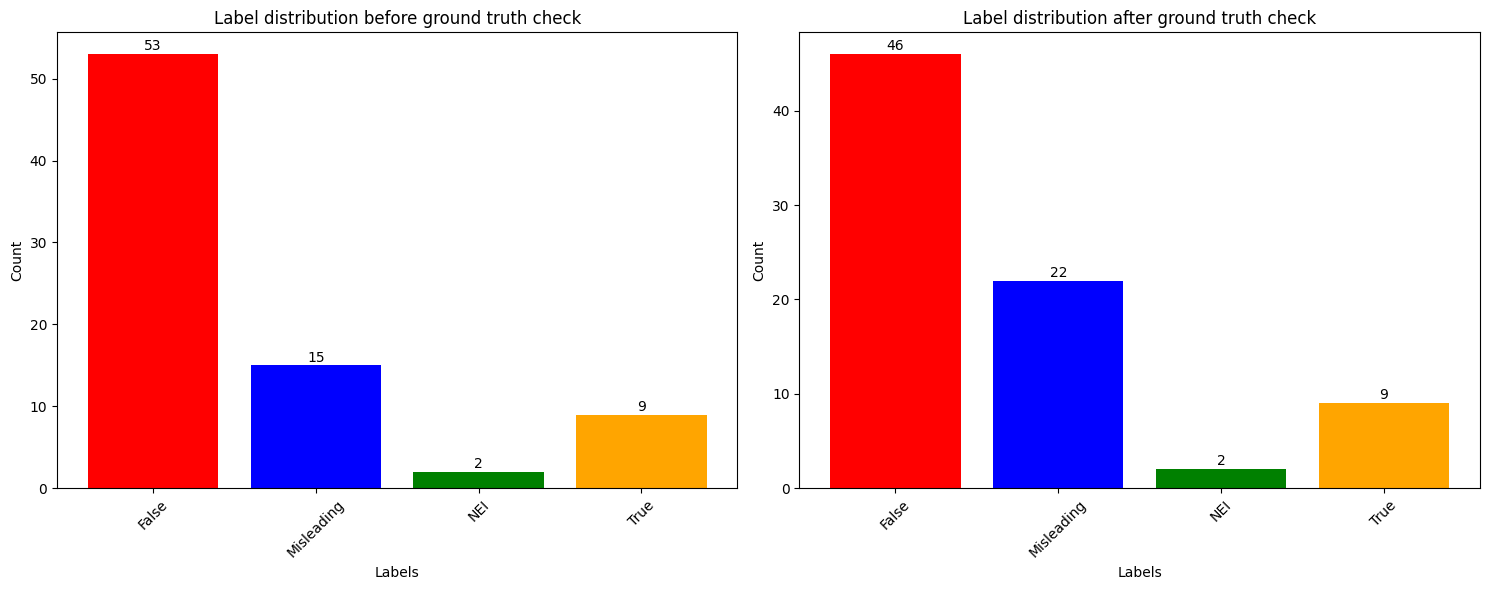

In [59]:
## Visualize the label distributions
import matplotlib.pyplot as plt
import numpy as np

# Get label distributions
original_label_distribution = df_ukraine_russia_final_merged["Label"].value_counts()
corrected_label_distribution = df_ukraine_russia_final_merged["actual_gt_label"].value_counts()

# Get unique labels from both distributions
all_labels = list(set(original_label_distribution.index) | set(corrected_label_distribution.index))
all_labels.sort()  # Sort for consistent ordering

# Define consistent colors for each label
colors = ['red', 'blue', 'green', 'orange']  # You can customize these colors
label_colors = {label: colors[i % len(colors)] for i, label in enumerate(all_labels)}

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot original label distribution (left subplot)
original_values = [original_label_distribution.get(label, 0) for label in all_labels]
original_colors = [label_colors[label] for label in all_labels]

bars1 = axes[0].bar(all_labels, original_values, color=original_colors)
axes[0].set_ylabel("Count")
axes[0].set_xlabel("Labels")
axes[0].set_title("Label distribution before ground truth check")
axes[0].tick_params(axis='x', rotation=45)

# Add frequency labels on bars
for i, (bar, value) in enumerate(zip(bars1, original_values)):
    if value > 0:  # Only add label if count is greater than 0
        axes[0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.1,
                    str(value), ha='center', va='bottom', fontsize=10)

# Plot corrected label distribution (right subplot)
corrected_values = [corrected_label_distribution.get(label, 0) for label in all_labels]
corrected_colors = [label_colors[label] for label in all_labels]

bars2 = axes[1].bar(all_labels, corrected_values, color=corrected_colors)
axes[1].set_ylabel("Count")
axes[1].set_xlabel("Labels")
axes[1].set_title("Label distribution after ground truth check")
axes[1].tick_params(axis='x', rotation=45)

# Add frequency labels on bars
for i, (bar, value) in enumerate(zip(bars2, corrected_values)):
    if value > 0:  # Only add label if count is greater than 0
        axes[1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.1,
                    str(value), ha='center', va='bottom', fontsize=10)

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plot
plt.show()


In [60]:
# Let's check all in once (Website, Claim Type and Original Label)

claims_gt_label_incorrect.groupby(["Website", "Normal_Image", "Label"])["actual_gt_label"].value_counts()


Website            Normal_Image  Label  actual_gt_label
AFP Factcheck      True          False  Misleading         4
Reuters            False         False  Misleading         1
checkyourfact.com  False         False  Misleading         1
                   True          False  Misleading         1
Name: count, dtype: int64

- Similar pattern than in the gaza-israel dataset. Most of the wrong-labeled claims are claims with normal images from AFP Facthech that should have had the label "Misleading" instead of "False". 2 of the 7 claims are also text-only claims from Reuters and checkyourfact.com

In [61]:
## Let's save the merged df 

df_ukraine_russia_final_merged.to_csv("ukraine_russia_dataset_combined_010724_300425_final_gt_label_checked.csv")